# Miami Climate Analysis

In this project we will be analyzing the climate data of the city of Miami and its outskirts for the year 2023. Miami has been known across the world as a glamourous coastline city however with recent climate impacts it has become one of the most known example of cities where we can observe impact of climate change every year.

While we would have loved to make a detailed analysis coverign Oceanic data like Tides and ENSO for this project we will cover the only few selected parameters such as Precipitation, Temperature, Wind Speed, and Groundwater levels. Miami itself is not a big city so we also did our analysis on the districts near it, namely Kendall and Opa Locka. 

We used NOAA's Climate Data Online Portal to obtain weather related data for all three locations. For this we selected Airports based Stations as they had complete data for the period under consideration.

For groundwater levels we used NWIS data for the same period. We selected the well sites which are close to the airports, for simplicity sake, for this project we will name them as per the airports too.

Whole project will be divided into three following parts:

1. **Data Preperation**
2. **Data Analysis**
3. **Conclusion**

In first part we will be loading and tidying the datasets. In Data Analysis we will gather various kinds of statistics and make a lot of visualizations, through out the Data Analysis we will also present our main observations related to the statisticss and visualizations. And finally we will summarize the findings and conclude the project.

**Note: Readers could get different conclusions based on the stations and well sites they have chosen. For this project we have chosen three Weather Stations and three Underground Well Sites.**

## Data Preperation

In this part we will load the datasets from NOAA and NWIS, clean them, and overall prepare for the further analysis.

In [1]:
#Loading the required libraries

import dataretrieval.nwis as nwis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

For our Miami Climate Anaylsis we have chosen weather station at MIAMI INTERNATIONAL AIRPORT, MIAMI BEACH, MIAMI KENDALL TAMIAMI EXEC AIRPORT, and MIAMI OPA LOCKA AIRPORT as our primary source of data however they lacks Groundwater level which is also an important parameter of interest in our analysis, therefore we have chosen USGS 255616080180301, 255526080143001, and 253640080264701 wellsites near the weather station as our source of data for growndwater level.

It is to be noted again that readers can have different findings based on the different data sources since there are many alternatives. We would suggest gathering data from more sources and more types of data to get better results, however it is out of scope for this project.

In [2]:
#Retrieving data for USGS 255616080180301 G -3571, 255526080143001 S - 18, and 253640080264701 G -1362A for the year 2023

data_gw_int = nwis.get_record(sites = '255616080180301', service = 'dv', start = '2023-01-01', end = '2023-12-31')
data_gw_ken = nwis.get_record(sites = '255526080143001', service = 'dv', start = '2023-01-01', end = '2023-12-31')
data_gw_opa = nwis.get_record(sites = '253640080264701', service = 'dv', start = '2023-01-01', end = '2023-12-31')

In [3]:
data_gw_int.head()

,site_no,62610_Maximum,62610_Maximum_cd
datetime,,,
2023-01-01 00:00:00+00:00,255616080180301,2.53,A
2023-01-02 00:00:00+00:00,255616080180301,2.53,A
2023-01-03 00:00:00+00:00,255616080180301,2.51,A
2023-01-04 00:00:00+00:00,255616080180301,2.51,A
2023-01-05 00:00:00+00:00,255616080180301,2.49,A


In [4]:
data_gw_ken.head()

,site_no,62610_Maximum,62610_Maximum_cd
datetime,,,
2023-01-01 00:00:00+00:00,255526080143001,2.02,A
2023-01-02 00:00:00+00:00,255526080143001,2.01,A
2023-01-03 00:00:00+00:00,255526080143001,2.01,A
2023-01-04 00:00:00+00:00,255526080143001,2.01,A
2023-01-05 00:00:00+00:00,255526080143001,2.00,A


In [5]:
data_gw_opa.head()

,site_no,62610_Maximum,62610_Maximum_cd,62611_Maximum,62611_Maximum_cd
datetime,,,,,
2023-01-01 00:00:00+00:00,253640080264701,3.44,A,1.91,A
2023-01-02 00:00:00+00:00,253640080264701,3.43,A,1.90,A
2023-01-03 00:00:00+00:00,253640080264701,3.41,A,1.88,A
2023-01-04 00:00:00+00:00,253640080264701,3.40,A,1.87,A
2023-01-05 00:00:00+00:00,253640080264701,3.38,A,1.85,A


In [6]:
data_gw_ken.describe()

,62610_Maximum
count,365.000000
mean,2.325123
std,0.527897
min,1.750000
25%,2.020000
50%,2.210000
75%,2.460000
max,5.520000


In [7]:
#Checking NA values

print(data_gw_int.isna().sum())
print(data_gw_ken.isna().sum())
print(data_gw_opa.isna().sum())

site_no             0
62610_Maximum       0
62610_Maximum_cd    0
dtype: int64
site_no             0
62610_Maximum       0
62610_Maximum_cd    0
dtype: int64
site_no             0
62610_Maximum       0
62610_Maximum_cd    0
62611_Maximum       0
62611_Maximum_cd    0
dtype: int64


In [8]:
print('Miami International Airport GW data Shape:', data_gw_int.shape)
print('Miami Kendall Airport GW data Shape:', data_gw_ken.shape)
print("Miami Opa Locka Airport GW data Shape:", data_gw_opa.shape)

Miami International Airport GW data Shape: (365, 3)
Miami Kendall Airport GW data Shape: (365, 3)
Miami Opa Locka Airport GW data Shape: (365, 5)


In [9]:
print(data_gw_int.site_no.unique()) 
print(data_gw_int['62610_Maximum_cd'].unique()) 

['255616080180301']
['A']


We have correctly loaded the datasets from NWIS api. We have also checked them for NA values and other things to make sure that it loaded properly and contains the dataset for the 2023.

In [10]:
data_gw_int.reset_index(inplace = True)
print(data_gw_int.head())

data_gw_ken.reset_index(inplace = True)
print(data_gw_ken.head())

data_gw_opa.reset_index(inplace = True)
print(data_gw_opa.head())

                   datetime          site_no  62610_Maximum 62610_Maximum_cd
0 2023-01-01 00:00:00+00:00  255616080180301           2.53                A
1 2023-01-02 00:00:00+00:00  255616080180301           2.53                A
2 2023-01-03 00:00:00+00:00  255616080180301           2.51                A
3 2023-01-04 00:00:00+00:00  255616080180301           2.51                A
4 2023-01-05 00:00:00+00:00  255616080180301           2.49                A
                   datetime          site_no  62610_Maximum 62610_Maximum_cd
0 2023-01-01 00:00:00+00:00  255526080143001           2.02                A
1 2023-01-02 00:00:00+00:00  255526080143001           2.01                A
2 2023-01-03 00:00:00+00:00  255526080143001           2.01                A
3 2023-01-04 00:00:00+00:00  255526080143001           2.01                A
4 2023-01-05 00:00:00+00:00  255526080143001           2.00                A
                   datetime          site_no  62610_Maximum 62610_Maximum_cd

In [11]:
#62610_Maximum is the code for the groundwater level

data_gw_int = data_gw_int.loc[:,data_gw_int.columns.isin(['datetime', '62610_Maximum'])]
data_gw_ken = data_gw_ken.loc[:,data_gw_ken.columns.isin(['datetime', '62610_Maximum'])]
data_gw_opa = data_gw_opa.loc[:,data_gw_opa.columns.isin(['datetime', '62610_Maximum'])]

In [12]:
#Converting datetime to proper desired format

data_gw_int.datetime = pd.to_datetime(data_gw_int.datetime)
data_gw_int.datetime = data_gw_int.datetime.dt.strftime('%Y-%m-%d')

data_gw_ken.datetime = pd.to_datetime(data_gw_ken.datetime)
data_gw_ken.datetime = data_gw_ken.datetime.dt.strftime('%Y-%m-%d')

data_gw_opa.datetime = pd.to_datetime(data_gw_opa.datetime)
data_gw_opa.datetime = data_gw_opa.datetime.dt.strftime('%Y-%m-%d')

In [13]:
data_gw_int.columns = ['DATE', 'GW_LEVEL']
data_gw_ken.columns = ['DATE', 'GW_LEVEL']
data_gw_opa.columns = ['DATE', 'GW_LEVEL']

In [14]:
data_gw_int.head()

,DATE,GW_LEVEL
0,2023-01-01,2.53
1,2023-01-02,2.53
2,2023-01-03,2.51
3,2023-01-04,2.51
4,2023-01-05,2.49


In [15]:
data_gw_ken.head()

,DATE,GW_LEVEL
0,2023-01-01,2.02
1,2023-01-02,2.01
2,2023-01-03,2.01
3,2023-01-04,2.01
4,2023-01-05,2.00


In [16]:
data_gw_opa.head()

,DATE,GW_LEVEL
0,2023-01-01,3.44
1,2023-01-02,3.43
2,2023-01-03,3.41
3,2023-01-04,3.40
4,2023-01-05,3.38


In [17]:
#Merging the datasets

data_gw_total = pd.merge(data_gw_int, data_gw_ken, on = 'DATE', how = 'inner', suffixes = ('_INT', '_KEN'))
data_gw_total = pd.merge(data_gw_total, data_gw_opa, on = 'DATE', how = 'inner', suffixes = ('_INT', '_OPA'))

In [18]:
data_gw_total.head()

,DATE,GW_LEVEL_INT,GW_LEVEL_KEN,GW_LEVEL
0,2023-01-01,2.53,2.02,3.44
1,2023-01-02,2.53,2.01,3.43
2,2023-01-03,2.51,2.01,3.41
3,2023-01-04,2.51,2.01,3.40
4,2023-01-05,2.49,2.00,3.38


In [19]:
#correcting the column names

data_gw_total.columns = ['DATE', 'GW_LEVEL_INT', 'GW_LEVEL_KEN', 'GW_LEVEL_OPA']

In [20]:
data_gw_total['GW_LEVEL_MEAN'] = data_gw_total[['GW_LEVEL_INT', 'GW_LEVEL_KEN', 'GW_LEVEL_OPA']].mean(axis = 1)

In [21]:
data_gw_total.head()

,DATE,GW_LEVEL_INT,GW_LEVEL_KEN,GW_LEVEL_OPA,GW_LEVEL_MEAN
0,2023-01-01,2.53,2.02,3.44,2.663333
1,2023-01-02,2.53,2.01,3.43,2.656667
2,2023-01-03,2.51,2.01,3.41,2.643333
3,2023-01-04,2.51,2.01,3.40,2.640000
4,2023-01-05,2.49,2.00,3.38,2.623333


At this point we have properly loaded the Growndwater level data and tidied it such that we can merge it with our weather data. Now we will load the weather data from a csv file obtained from NOAA, merge Growndwater data, and tidy it for the further analysis.

In [22]:
#Loading the weather data

df_w = pd.read_csv('3777302.csv')

df_w.head()

,STATION,NAME,DATE,AWND,PRCP,TMAX,TMIN
0,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",2023-01-01,4.47,0.0,86.0,69.0
1,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",2023-01-02,7.16,0.0,84.0,68.0
2,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",2023-01-03,10.51,0.0,83.0,73.0
3,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",2023-01-04,8.50,0.0,84.0,73.0
4,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",2023-01-05,5.37,0.0,86.0,72.0


In [23]:
df_w.NAME.unique()

array(['MIAMI INTERNATIONAL AIRPORT, FL US',
       'MIAMI KENDALL TAMIAMI EXEC AIRPORT, FL US',
       'MIAMI OPA LOCKA AIRPORT, FL US'], dtype=object)

In [24]:
df_w.shape

(1093, 7)

In [25]:
df_w.dtypes

STATION     object
NAME        object
DATE        object
AWND       float64
PRCP       float64
TMAX       float64
TMIN       float64
dtype: object

In [26]:
df_w.DATE = pd.to_datetime(df_w.DATE)

In [27]:
#Checking for NA values

df_w.isna().sum()

STATION    0
NAME       0
DATE       0
AWND       0
PRCP       2
TMAX       2
TMIN       2
dtype: int64

In [28]:
df_w.groupby('NAME').apply(lambda x: x.isna().sum())

,STATION,NAME,DATE,AWND,PRCP,TMAX,TMIN
NAME,,,,,,,
"MIAMI INTERNATIONAL AIRPORT, FL US",0,0,0,0,0,0,0
"MIAMI KENDALL TAMIAMI EXEC AIRPORT, FL US",0,0,0,0,0,1,1
"MIAMI OPA LOCKA AIRPORT, FL US",0,0,0,0,2,1,1


We have some missing values in our dataset for Miami Kendall and Miami Opalocka airports. For the purpose of analyzing across the weather stations we will not remove these na values and for the merged dataset we will take the mean of other remaining stations.

It is to be noted that we are adopting this approach because we are covering limited period. If we are to analyze larger periods over 10 years and more we could remove the rows having na values altogether.

We can't merge the current dataset with the groundwater level dataset as it has duplicate date values. To mitigate this we will clean the dataset first and then make a new column recording mean of the Precipitation, Maximum Temperature, and Minimum Temperature across all weather stations for each day and then merge it with the groundwater level dataset.

In [29]:
df_w.head()

,STATION,NAME,DATE,AWND,PRCP,TMAX,TMIN
0,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",2023-01-01,4.47,0.0,86.0,69.0
1,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",2023-01-02,7.16,0.0,84.0,68.0
2,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",2023-01-03,10.51,0.0,83.0,73.0
3,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",2023-01-04,8.50,0.0,84.0,73.0
4,USW00012839,"MIAMI INTERNATIONAL AIRPORT, FL US",2023-01-05,5.37,0.0,86.0,72.0


In [30]:
df_w.drop('STATION', axis = 1, inplace = True)

In [31]:
df_w.head()

,NAME,DATE,AWND,PRCP,TMAX,TMIN
0,"MIAMI INTERNATIONAL AIRPORT, FL US",2023-01-01,4.47,0.0,86.0,69.0
1,"MIAMI INTERNATIONAL AIRPORT, FL US",2023-01-02,7.16,0.0,84.0,68.0
2,"MIAMI INTERNATIONAL AIRPORT, FL US",2023-01-03,10.51,0.0,83.0,73.0
3,"MIAMI INTERNATIONAL AIRPORT, FL US",2023-01-04,8.50,0.0,84.0,73.0
4,"MIAMI INTERNATIONAL AIRPORT, FL US",2023-01-05,5.37,0.0,86.0,72.0


At this point we have clean weather dataset for three stations across Miami. Now we will be creating a merged dataset for all three stations along with groundlevel data.

df_w_total will contain Mean values of Precipitation, Maximum Temperature, Minimum Temperature and Average Wind Speed across all three stations for each day.

In [32]:
#Creating df_w_total which will be used to create merged dataset and monthly dataset

df_w_total = df_w.groupby('DATE')[['PRCP', 'TMAX', 'TMIN','AWND']].mean().reset_index()
df_w_total.head()

,DATE,PRCP,TMAX,TMIN,AWND
0,2023-01-01,0.0,86.333333,64.666667,3.876667
1,2023-01-02,0.0,83.666667,66.000000,6.783333
2,2023-01-03,0.0,83.000000,70.666667,9.396667
3,2023-01-04,0.0,84.000000,71.333333,8.053333
4,2023-01-05,0.0,85.333333,67.333333,5.220000


In [33]:
#Matching data column for inner join merge

df_w_total.DATE = pd.to_datetime(df_w_total.DATE)
df_w_total.DATE = df_w_total.DATE.dt.strftime('%Y-%m-%d')

In [34]:
#Merging both datasets

df = pd.merge(data_gw_total, df_w_total, on = 'DATE', how = 'inner')

df.head()

,DATE,GW_LEVEL_INT,GW_LEVEL_KEN,GW_LEVEL_OPA,GW_LEVEL_MEAN,PRCP,TMAX,TMIN,AWND
0,2023-01-01,2.53,2.02,3.44,2.663333,0.0,86.333333,64.666667,3.876667
1,2023-01-02,2.53,2.01,3.43,2.656667,0.0,83.666667,66.000000,6.783333
2,2023-01-03,2.51,2.01,3.41,2.643333,0.0,83.000000,70.666667,9.396667
3,2023-01-04,2.51,2.01,3.40,2.640000,0.0,84.000000,71.333333,8.053333
4,2023-01-05,2.49,2.00,3.38,2.623333,0.0,85.333333,67.333333,5.220000


In [35]:
df.shape

(365, 9)

In [36]:
#Checking NA values

df.isna().sum()

DATE             0
GW_LEVEL_INT     0
GW_LEVEL_KEN     0
GW_LEVEL_OPA     0
GW_LEVEL_MEAN    0
PRCP             0
TMAX             0
TMIN             0
AWND             0
dtype: int64

In [37]:
#Summary statistics of merged dataset 

df.describe()

,GW_LEVEL_INT,GW_LEVEL_KEN,GW_LEVEL_OPA,GW_LEVEL_MEAN,PRCP,TMAX,TMIN,AWND
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,3.017068,2.325123,3.925014,3.089068,0.222973,86.610959,70.872603,7.243059
std,0.844679,0.527897,0.484955,0.550007,0.564283,6.138544,6.889099,2.997490
min,2.130000,1.750000,3.240000,2.383333,0.000000,61.333333,41.666667,2.460000
25%,2.470000,2.020000,3.560000,2.700000,0.000000,83.333333,67.333333,4.996667
50%,2.780000,2.210000,3.890000,3.023333,0.003333,87.333333,71.666667,6.710000
75%,3.260000,2.460000,4.210000,3.333333,0.216667,91.000000,76.333333,8.650000
max,7.430000,5.520000,5.580000,6.133333,7.053333,98.000000,82.666667,18.493333


In [38]:
#Checking duplicates

df.duplicated().sum()

0

In [39]:
df.dtypes

DATE              object
GW_LEVEL_INT     float64
GW_LEVEL_KEN     float64
GW_LEVEL_OPA     float64
GW_LEVEL_MEAN    float64
PRCP             float64
TMAX             float64
TMIN             float64
AWND             float64
dtype: object

At this stage, the dataset is cleaned and ready for analysis. However, before analysing the daily data further we will first look for the monthly aggregated data. We can use different measures of central tendency to analyse the monthly data like mean, median, and mode. For this analysis we will use Mean Aggregation for monthly data analysis

In [40]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['MONTH'] = df['DATE'].dt.month
df.head()

,DATE,GW_LEVEL_INT,GW_LEVEL_KEN,GW_LEVEL_OPA,GW_LEVEL_MEAN,PRCP,TMAX,TMIN,AWND,MONTH
0,2023-01-01,2.53,2.02,3.44,2.663333,0.0,86.333333,64.666667,3.876667,1
1,2023-01-02,2.53,2.01,3.43,2.656667,0.0,83.666667,66.000000,6.783333,1
2,2023-01-03,2.51,2.01,3.41,2.643333,0.0,83.000000,70.666667,9.396667,1
3,2023-01-04,2.51,2.01,3.40,2.640000,0.0,84.000000,71.333333,8.053333,1
4,2023-01-05,2.49,2.00,3.38,2.623333,0.0,85.333333,67.333333,5.220000,1


In [41]:
#Creating monthly averages dataset 

df_month = df.groupby('MONTH')[['GW_LEVEL_INT', 'GW_LEVEL_KEN','GW_LEVEL_OPA' ,'GW_LEVEL_MEAN', 'AWND', 'PRCP', 'TMAX', 'TMIN']].mean().reset_index()
df_month.head()

,MONTH,GW_LEVEL_INT,GW_LEVEL_KEN,GW_LEVEL_OPA,GW_LEVEL_MEAN,AWND,PRCP,TMAX,TMIN
0,1,2.348710,1.892581,3.331613,2.524301,7.196344,0.001505,80.118280,61.064516
1,2,2.781786,2.202857,3.840714,2.941786,7.789405,0.208095,83.107143,66.095238
2,3,2.257742,1.832903,3.316774,2.469140,8.192043,0.077473,84.720430,66.677419
3,4,3.702333,2.747667,3.761000,3.403667,8.513000,0.329556,86.233333,70.777778
4,5,2.866129,2.154839,4.070323,3.030430,7.020538,0.226989,88.301075,71.806452


At this point we have cleaned up our datasets and they is ready to start our analysis.

A brief summary of the steps we took so far:
1. We collected Weather Data for 2023 year for the three Miami Airports from NOAA website in form of CSV file.
2. We also collected groundwater level for the wellsites near the Airports from USGS website National Water Information Syste, in form of API calls.
3. We cleaned both datasets seperately and will use them for analysis.
4. We also merged the datasets and created a single dataset having data for Groundwater level, Precipitation, Temperature, and Average Wind Speed for 365 days.
5. We then created a new dataset with monthly mean of the above merged dataset for monthly analysis.

We will use the 5 Datasets obtained from this step for our analysis in next step:
1. **data_gw_total**
2. **data_w**
3. **df_w_total**
4. **df**
5. **df_month**

## Data Analysis

In this part we will be doing exploratory data analysis on all the datasets along with visualizations. We will be covering each and every point, first analyze their summary statistics like Mean, Median, Standard Deviation, and others before analyzing them further with visualizations.

We will also be making observations at each step.

This part will cover the datasets in following order:

1. **data_gw_total**
2. **data_w**
3. **df_w_total**
4. **df**
5. **df_month**

In [42]:
#Groundwater Level Dataset

data_gw_total.head()

,DATE,GW_LEVEL_INT,GW_LEVEL_KEN,GW_LEVEL_OPA,GW_LEVEL_MEAN
0,2023-01-01,2.53,2.02,3.44,2.663333
1,2023-01-02,2.53,2.01,3.43,2.656667
2,2023-01-03,2.51,2.01,3.41,2.643333
3,2023-01-04,2.51,2.01,3.40,2.640000
4,2023-01-05,2.49,2.00,3.38,2.623333


In [43]:
data_gw_total.describe()

,GW_LEVEL_INT,GW_LEVEL_KEN,GW_LEVEL_OPA,GW_LEVEL_MEAN
count,365.000000,365.000000,365.000000,365.000000
mean,3.017068,2.325123,3.925014,3.089068
std,0.844679,0.527897,0.484955,0.550007
min,2.130000,1.750000,3.240000,2.383333
25%,2.470000,2.020000,3.560000,2.700000
50%,2.780000,2.210000,3.890000,3.023333
75%,3.260000,2.460000,4.210000,3.333333
max,7.430000,5.520000,5.580000,6.133333


From above statistics we can make following observations:

1. Mean Groundwater level at Opa Locka is highest at 3.925014. Minimum also is highest for Opa Locka and its concerning because minimum is well above the mean for other groundwell sites.
2. Maximum Groundwater level observed during 2023 is at the groundwell near Miami International Airport at 7.43. We will further analyze the data for some trend as it also has highest variabilty among the three wellsites.
3. Overall Kendall Groundwater level is most stable as its showing less variability than others. It has least Standard Deviation and range in our dataset.

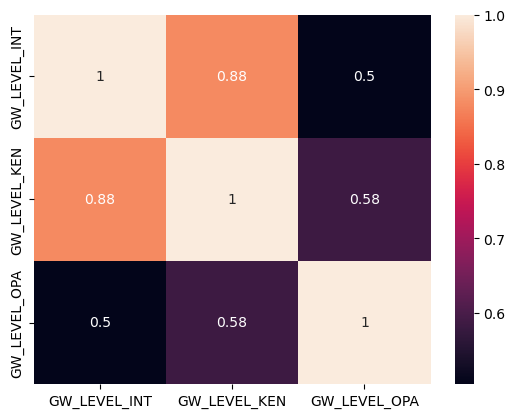

In [44]:
sns.heatmap(data_gw_total[['GW_LEVEL_INT', 'GW_LEVEL_KEN', 'GW_LEVEL_OPA']].corr(), annot=True)
plt.show()

There should not have been any correlation between the different wellsites however surprisingly we can observe high correlation across them from above heatmap, with correlation reaching 0.88 for Kendall and International Airport Wellsites. This reflects that even if Well Sites are miles apart they have some correlation/connections between them. It may be due to them getting water from nearby underlying sources which are connected to each other.

Regardless this is an interesting observation and we would suggest to look into it further by analyzing a large period of time and getting relevant expert opinions.

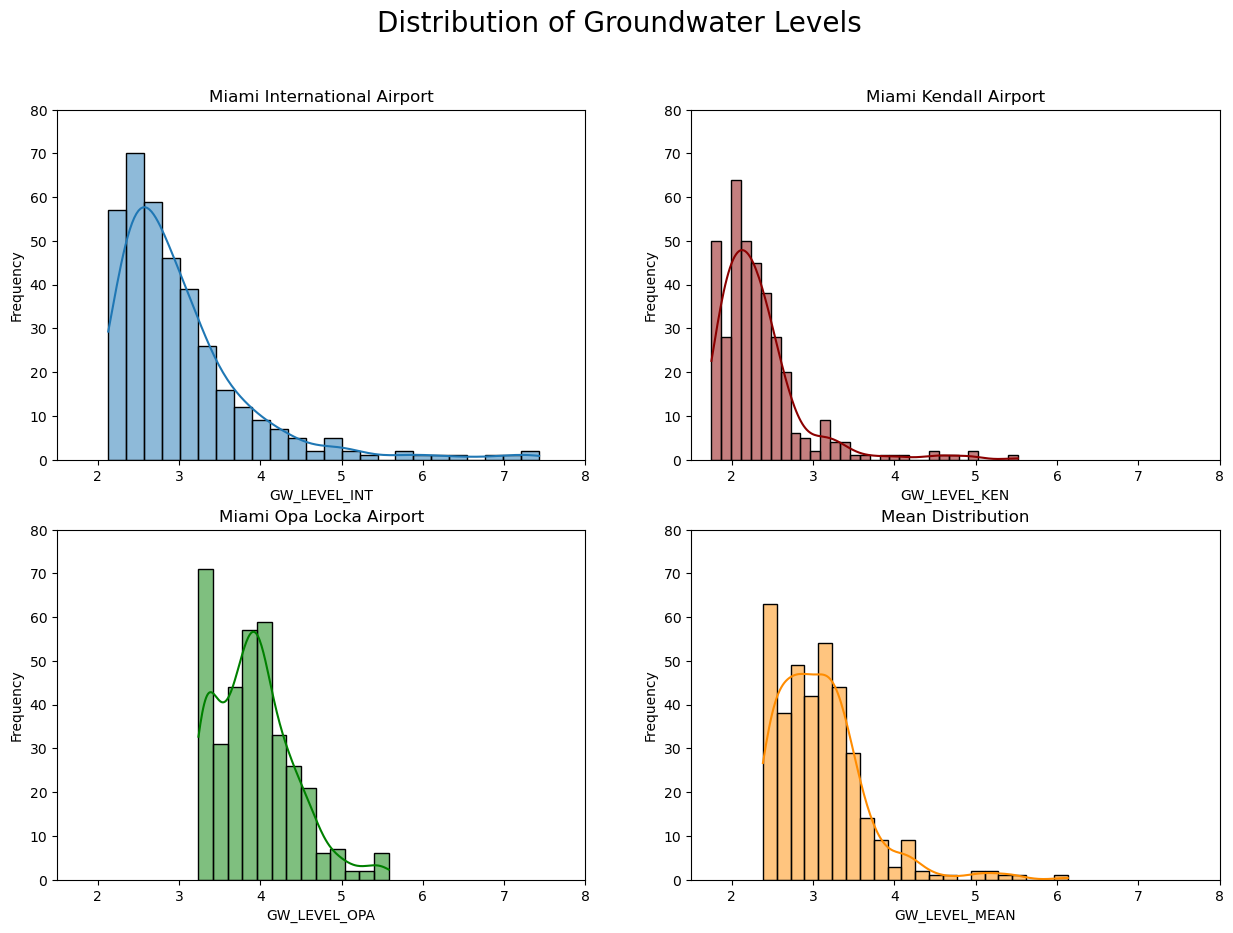

In [45]:
#Distribution of Groundwater Levels across different wellsites

fig, ax = plt.subplots(ncols = 2, nrows = 2,figsize = (15,10))

warnings.filterwarnings("ignore")

fig.suptitle('Distribution of Groundwater Levels', fontsize = 20)

sns.histplot(x = 'GW_LEVEL_INT', data = data_gw_total, ax = ax[0][0], kde = True)
ax[0][0].set_title('Miami International Airport')
ax[0][0].set_ylabel('Frequency')

sns.histplot(x = 'GW_LEVEL_KEN', data = data_gw_total, ax = ax[0][1], kde = True, color = 'darkred')
ax[0][1].set_title('Miami Kendall Airport')
ax[0][1].set_ylabel('Frequency')

sns.histplot(x = 'GW_LEVEL_OPA', data = data_gw_total, ax = ax[1][0], kde = True, color = 'green')
ax[1][0].set_title('Miami Opa Locka Airport')
ax[1][0].set_ylabel('Frequency')

sns.histplot(x = 'GW_LEVEL_MEAN', data = data_gw_total, ax = ax[1][1], kde = True, color = 'darkorange')
ax[1][1].set_title('Mean Distribution')
ax[1][1].set_ylabel('Frequency')

ax[0][0].set_ylim(0, 80)
ax[0][1].set_ylim(0, 80)
ax[1][0].set_ylim(0, 80)
ax[1][1].set_ylim(0, 80)

ax[0][0].set_xlim(1.5, 8)
ax[0][1].set_xlim(1.5, 8)
ax[1][0].set_xlim(1.5, 8)
ax[1][1].set_xlim(1.5, 8)

plt.show()

All of the distributions are right skewed, and its a good thing as it shows that most of the time we have groundwater level on the lower side. However we can also see that Opa Locka distribution has higher value overall and its impacting overall mean too.

On the basis of the above plots we can see that Opa Locka is able to impact the mean of overall distribution and if we have more such wellsites it will impact the Miami Groundlevel even more. We need further analysis to see if this statement truly holds or Opa Locka wellsite is one of the outlier.

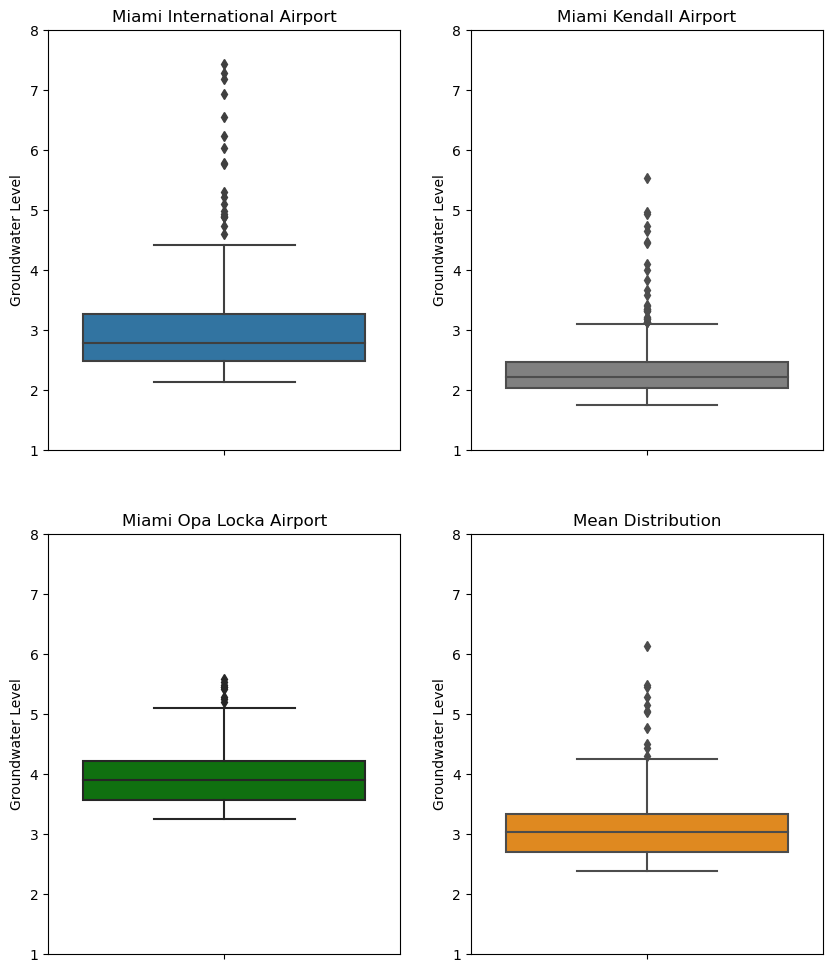

In [46]:
#Boxplot for Groundwater Levels across different wellsites

fig, ax = plt.subplots(ncols = 2, nrows = 2,figsize = (10,12))

warnings.filterwarnings("ignore")

sns.boxplot(y = 'GW_LEVEL_INT', data = data_gw_total, ax = ax[0][0])

sns.boxplot(y = 'GW_LEVEL_KEN', data = data_gw_total, ax = ax[0][1], color = 'grey')

sns.boxplot(y = 'GW_LEVEL_OPA', data = data_gw_total, ax = ax[1][0], color = 'green')

sns.boxplot(y = 'GW_LEVEL_MEAN', data = data_gw_total, ax = ax[1][1], color = 'darkorange')

ax[0][0].set_title('Miami International Airport')
ax[0][1].set_title('Miami Kendall Airport')
ax[1][0].set_title('Miami Opa Locka Airport')
ax[1][1].set_title('Mean Distribution')

ax[0][0].set_ylabel('Groundwater Level')
ax[0][1].set_ylabel('Groundwater Level')
ax[1][0].set_ylabel('Groundwater Level')
ax[1][1].set_ylabel('Groundwater Level')

ax[0][0].set_ylim(1, 8)
ax[0][1].set_ylim(1, 8)
ax[1][0].set_ylim(1, 8)
ax[1][1].set_ylim(1, 8)

plt.show()

Boxplots help us get an idea of the distribution of the data along with outliers. Here we can draw following observations:

1. Corroborating our previous findings we can see that Wellsite near Opa Locka Airport has much higher distribution than others but with fewer outliers overall.
2. Opa Locka is indeed forcing the mean distribution to have a higher Groundwater level.
3. Kendall Airport wellsite has least variable distribution for Groundwater levels with Miami International Airport wellsite having highest variability.

Overall findings are similar to the summary statistics and distributions. Opa Locka wellsite has higher distribution which is influencing overall mean. Kendall wellsite has least variablity and is more stable and safe overall while International Airport wellsite has highest variability and most numbers of outliers.

### Weather Data Set

In this section we will analyse Climate dataset which has data related to Precipitation, Maximum and Minimum Temperature along with Average Wind Speed for the year 2023 for three stations mantained by Airports of interest: Miami Opa Locka Airport, Miami Kendall Airport, and Miami International Airport.

We will use both df_w and df_w_total for analysis.

In [47]:
#Weather Dataset

df_w.head()

,NAME,DATE,AWND,PRCP,TMAX,TMIN
0,"MIAMI INTERNATIONAL AIRPORT, FL US",2023-01-01,4.47,0.0,86.0,69.0
1,"MIAMI INTERNATIONAL AIRPORT, FL US",2023-01-02,7.16,0.0,84.0,68.0
2,"MIAMI INTERNATIONAL AIRPORT, FL US",2023-01-03,10.51,0.0,83.0,73.0
3,"MIAMI INTERNATIONAL AIRPORT, FL US",2023-01-04,8.50,0.0,84.0,73.0
4,"MIAMI INTERNATIONAL AIRPORT, FL US",2023-01-05,5.37,0.0,86.0,72.0


In [48]:
df_w.groupby('NAME')[['AWND', 'PRCP', 'TMAX', 'TMIN']].describe().T

NAME        MIAMI INTERNATIONAL AIRPORT, FL US  \
AWND count                          365.000000   
     mean                             6.974767   
     std                              2.853239   
     min                              2.240000   
     25%                              4.920000   
     50%                              6.490000   
     75%                              8.280000   
     max                             18.790000   
PRCP count                          365.000000   
     mean                             0.228575   
     std                              0.695748   
     min                              0.000000   
     25%                              0.000000   
     50%                              0.000000   
     75%                              0.120000   
     max                              7.530000   
TMAX count                          365.000000   
     mean                            86.865753   
     std                              6.190302   
     min                             62.000000   
     25%                             84.000000   
     50%                             88.000000   
     75%                             91.000000   
     max                             98.000000   
TMIN count                          365.000000   
     mean                            72.824658   
     std                              6.618069   
     min                             44.000000   
     25%                             69.000000   
     50%                             73.000000   
     75%                             78.000000   
     max                             84.000000   

NAME        MIAMI KENDALL TAMIAMI EXEC AIRPORT, FL US  \
AWND count                                 364.000000   
     mean                                    6.978104   
     std                                     3.170711   
     min                                     0.890000   
     25%                                     4.470000   
     50%                                     6.490000   
     75%                                     8.720000   
     max                                    19.010000   
PRCP count                                 364.000000   
     mean                                    0.218022   
     std                                     0.645912   
     min                                     0.000000   
     25%                                     0.000000   
     50%                                     0.000000   
     75%                                     0.100000   
     max                                     7.050000   
TMAX count                                 363.000000   
     mean                                   86.790634   
     std                                     6.348987   
     min                                    62.000000   
     25%                                    83.000000   
     50%                                    87.000000   
     75%                                    91.000000   
     max                                   100.000000   
TMIN count                                 363.000000   
     mean                                   69.027548   
     std                                     7.534034   
     min                                    38.000000   
     25%                                    64.000000   
     50%                                    70.000000   
     75%                                    75.000000   
     max                                    84.000000   

NAME        MIAMI OPA LOCKA AIRPORT, FL US  
AWND count                      364.000000  
     mean                         7.795962  
     std                          3.257696  
     min                          2.460000  
     25%                          5.370000  
     50%                          7.160000  
     75%                          9.400000  
     max                         21.700000  
PRCP count                      362.000000  
     mean        

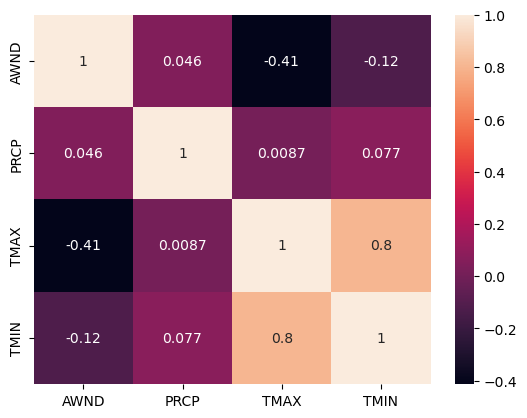

In [49]:
sns.heatmap(df_w[['AWND', 'PRCP', 'TMAX', 'TMIN']].corr(), annot=True)
plt.show()

These are basic statistics of the weather data. Here we can see that distribution appears to be quite similar for all three stations as they are producing similar results overall. 

Heatmap above is also showing that four parameters of interest here does not correlate much, besides TMAX and TMIN, which was an expected result as both Minimum and Maximum temperature for a day are indeed highly correlated across the world.

We will now further analyze them, first we will analyze Average Wind Speed and then other major parameters such as Precipitation and Maximum/ Minimum Temperature.

In [50]:
#Summary Statistics for Average Wind Speed

df_w.groupby('NAME')[['AWND']].describe().T

NAME        MIAMI INTERNATIONAL AIRPORT, FL US  \
AWND count                          365.000000   
     mean                             6.974767   
     std                              2.853239   
     min                              2.240000   
     25%                              4.920000   
     50%                              6.490000   
     75%                              8.280000   
     max                             18.790000   

NAME        MIAMI KENDALL TAMIAMI EXEC AIRPORT, FL US  \
AWND count                                 364.000000   
     mean                                    6.978104   
     std                                     3.170711   
     min                                     0.890000   
     25%                                     4.470000   
     50%                                     6.490000   
     75%                                     8.720000   
     max                                    19.010000   

NAME        MIAMI OPA LOCKA AIRPORT, FL US  
AWND count                      364.000000  
     mean                         7.795962  
     std                          3.257696  
     min                          2.460000  
     25%                          5.370000  
     50%                          7.160000  
     75%                          9.400000  
     max                         21.700000

In [51]:
print("Range:", df_w.groupby('NAME')[['AWND']].max() - df_w.groupby('NAME')[['AWND']].min())
print("\nIQR:", df_w.groupby('NAME')[['AWND']].quantile(0.75) - df_w.groupby('NAME')[['AWND']].quantile(0.25))

Range:                                             AWND
NAME                                            
MIAMI INTERNATIONAL AIRPORT, FL US         16.55
MIAMI KENDALL TAMIAMI EXEC AIRPORT, FL US  18.12
MIAMI OPA LOCKA AIRPORT, FL US             19.24

IQR:                                            AWND
NAME                                           
MIAMI INTERNATIONAL AIRPORT, FL US         3.36
MIAMI KENDALL TAMIAMI EXEC AIRPORT, FL US  4.25
MIAMI OPA LOCKA AIRPORT, FL US             4.03


In [52]:
df_w['NAME'].unique()

array(['MIAMI INTERNATIONAL AIRPORT, FL US',
       'MIAMI KENDALL TAMIAMI EXEC AIRPORT, FL US',
       'MIAMI OPA LOCKA AIRPORT, FL US'], dtype=object)

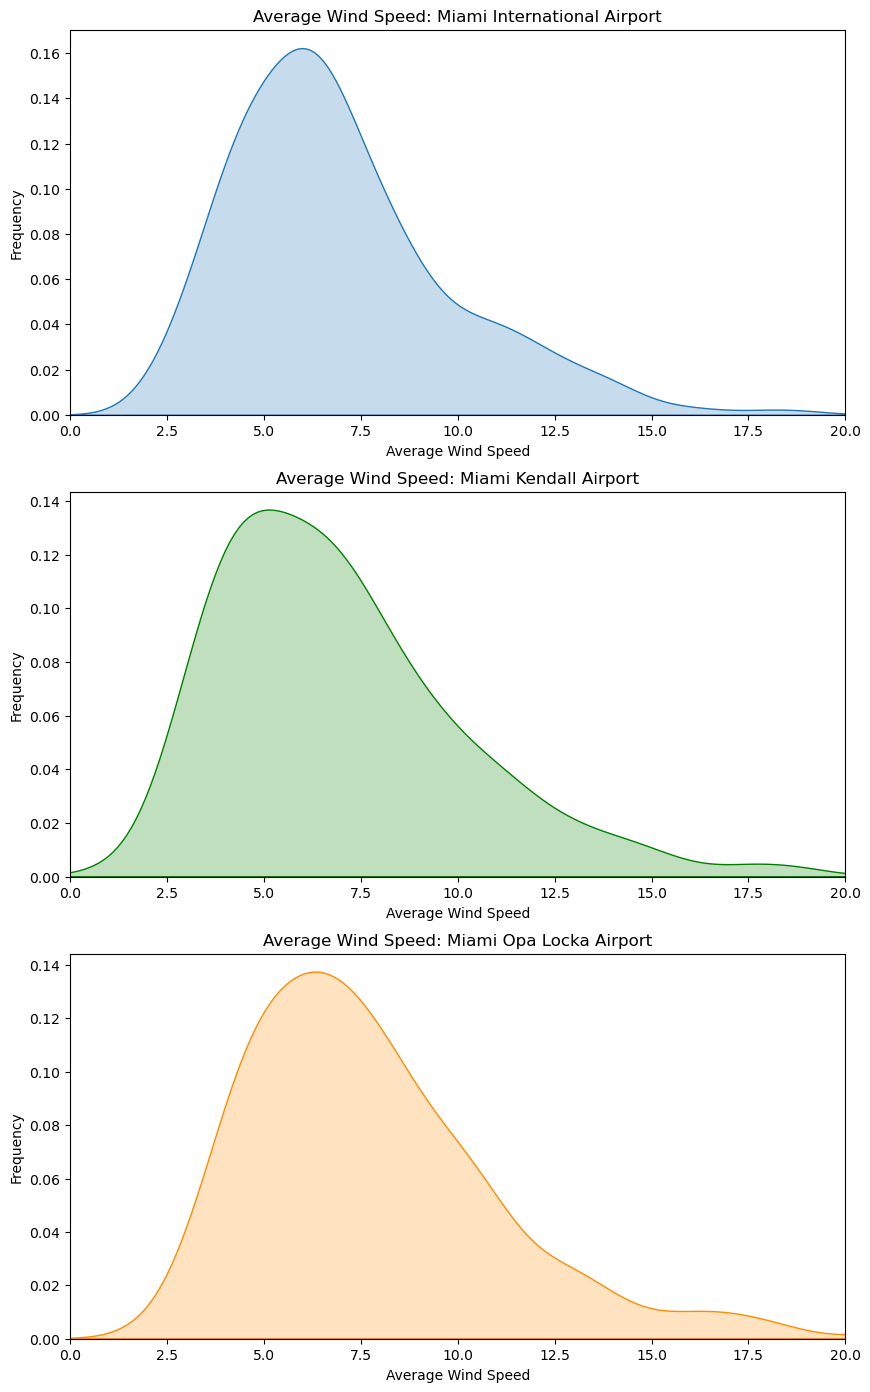

In [53]:
#For getting the idea of distribution for Average Wind Speed we will use KDE Plots

fig, ax = plt.subplots(nrows = 3,figsize = (10,17))

sns.kdeplot(x = 'AWND', data = df_w.loc[df_w['NAME'] == 'MIAMI INTERNATIONAL AIRPORT, FL US'], ax = ax[0], fill = True)

sns.kdeplot(x = 'AWND', data = df_w.loc[df_w['NAME'] == 'MIAMI KENDALL TAMIAMI EXEC AIRPORT, FL US'], ax = ax[1], fill = True, color = 'green')

sns.kdeplot(x = 'AWND', data = df_w.loc[df_w['NAME'] == 'MIAMI OPA LOCKA AIRPORT, FL US'], ax = ax[2], fill = True, color = 'darkorange')

ax[0].set_ylabel('Frequency')
ax[1].set_ylabel('Frequency')
ax[2].set_ylabel('Frequency')

ax[0].set_xlabel('Average Wind Speed')
ax[1].set_xlabel('Average Wind Speed')
ax[2].set_xlabel('Average Wind Speed')

ax[0].set_title('Average Wind Speed: Miami International Airport')
ax[1].set_title('Average Wind Speed: Miami Kendall Airport')
ax[2].set_title('Average Wind Speed: Miami Opa Locka Airport')

ax[0].set_xlim(0, 20)
ax[1].set_xlim(0, 20)
ax[2].set_xlim(0, 20)

plt.show()

All three KDE Plots show that Average Wind Speed is normally distributed with a slightly right skew. Overall distributions looks similar, we will now use Boxplots to see if there are any outliers.

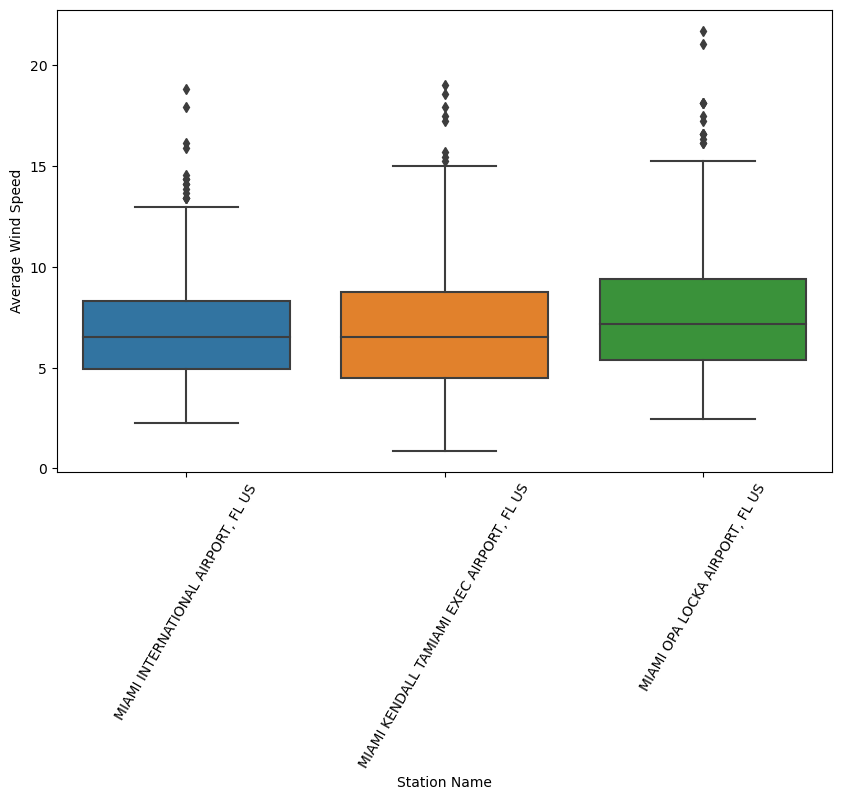

In [54]:
fig, ax = plt.subplots(figsize = (10,6))

sns.boxplot(y = 'AWND', x = 'NAME', data = df_w)

plt.xticks(rotation = 60)
plt.xlabel('Station Name')

plt.ylabel('Average Wind Speed')

plt.show()

There are outliers across all three stations but its nothing major as its in acceptable range. 

Distribution of Kendall and Opa Locka stations are quite similar as far as variability are concerned with International Airport station having least variability but with greater amount of outliers. Still, overall medians of all three stations are close to each other and distributions appear similar too as we saw in KDE.

This tells us that as far as Average Wind Speed is concerned all three stations across the Miami are producing similar results. There can be some interesting findings but we need more data, further analysis, and most probably some domain expert's help to obtain them.

Now we will analyze the dataset for Precipitation, Max Temperature, and Min Temperature.

In [55]:
#summary statistics for Precipitation

df_w.groupby('NAME')[['PRCP']].describe().T

NAME        MIAMI INTERNATIONAL AIRPORT, FL US  \
PRCP count                          365.000000   
     mean                             0.228575   
     std                              0.695748   
     min                              0.000000   
     25%                              0.000000   
     50%                              0.000000   
     75%                              0.120000   
     max                              7.530000   

NAME        MIAMI KENDALL TAMIAMI EXEC AIRPORT, FL US  \
PRCP count                                 364.000000   
     mean                                    0.218022   
     std                                     0.645912   
     min                                     0.000000   
     25%                                     0.000000   
     50%                                     0.000000   
     75%                                     0.100000   
     max                                     7.050000   

NAME        MIAMI OPA LOCKA AIRPORT, FL US  
PRCP count                      362.000000  
     mean                         0.220801  
     std                          0.635758  
     min                          0.000000  
     25%                          0.000000  
     50%                          0.000000  
     75%                          0.147500  
     max                          6.580000

In [56]:
print("Range:", df_w.groupby('NAME')[['PRCP']].max() - df_w.groupby('NAME')[['PRCP']].min())
print("\nIQR:", df_w.groupby('NAME')[['PRCP']].quantile(0.75) - df_w.groupby('NAME')[['PRCP']].quantile(0.25))

Range:                                            PRCP
NAME                                           
MIAMI INTERNATIONAL AIRPORT, FL US         7.53
MIAMI KENDALL TAMIAMI EXEC AIRPORT, FL US  7.05
MIAMI OPA LOCKA AIRPORT, FL US             6.58

IQR:                                              PRCP
NAME                                             
MIAMI INTERNATIONAL AIRPORT, FL US         0.1200
MIAMI KENDALL TAMIAMI EXEC AIRPORT, FL US  0.1000
MIAMI OPA LOCKA AIRPORT, FL US             0.1475


Overall distribution for precipitation appears to be similar across the stations. Miami Opa Locka has highest IQR but least range and standard deviation is highest with International Airport stations but there is only 0.05 difference from others. 

Still statistics are not that much different across the stations.

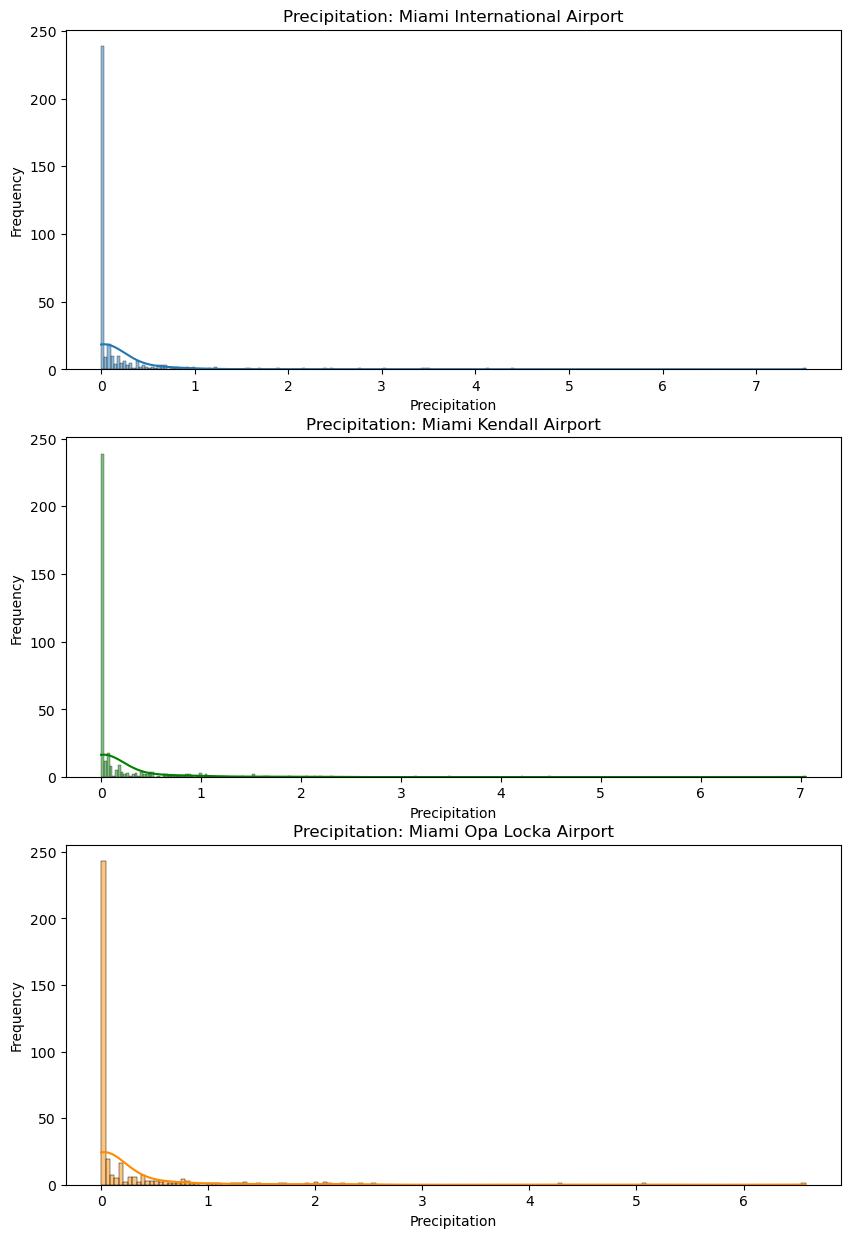

In [57]:
#For getting the idea of distribution for Precipitation we will use hist plots with kde

fig, ax = plt.subplots(nrows = 3,figsize = (10,15))

sns.histplot(x = 'PRCP', data = df_w.loc[df_w['NAME'] == 'MIAMI INTERNATIONAL AIRPORT, FL US'], ax = ax[0], kde = True)

sns.histplot(x = 'PRCP', data = df_w.loc[df_w['NAME'] == 'MIAMI KENDALL TAMIAMI EXEC AIRPORT, FL US'], ax = ax[1], kde = True, color = 'green')

sns.histplot(x = 'PRCP', data = df_w.loc[df_w['NAME'] == 'MIAMI OPA LOCKA AIRPORT, FL US'], ax = ax[2], kde = True, color = 'darkorange')

ax[0].set_ylabel('Frequency')
ax[1].set_ylabel('Frequency')
ax[2].set_ylabel('Frequency')

ax[0].set_xlabel('Precipitation')
ax[1].set_xlabel('Precipitation')
ax[2].set_xlabel('Precipitation')



ax[0].set_title('Precipitation: Miami International Airport')
ax[1].set_title('Precipitation: Miami Kendall Airport')
ax[2].set_title('Precipitation: Miami Opa Locka Airport')


plt.show()

We obtained a highly skewed distribution for Precipitation, which was expected as most counts belong to 0 precipitation and mean for all three stations is near 0.22 with international airport station having the highest mean at 0.2286.

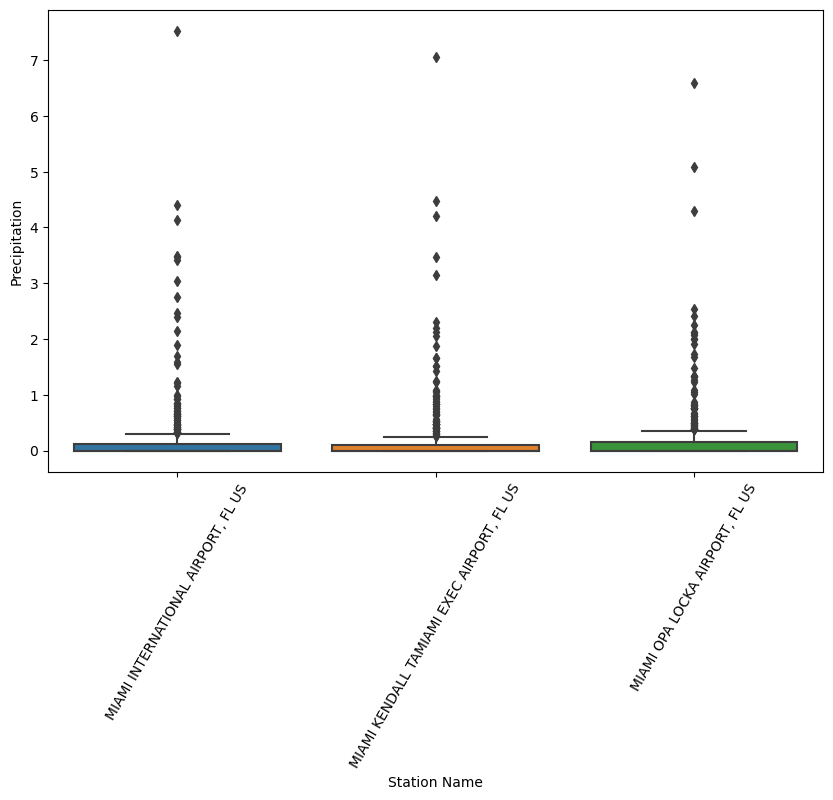

In [58]:
fig, ax = plt.subplots(figsize = (10,6))


sns.boxplot(y = 'PRCP', x = 'NAME', data = df_w)

plt.xticks(rotation = 60)
plt.xlabel('Station Name')

plt.ylabel('Precipitation')

plt.show()

Boxplots are not showing anything new here. All three stations have highly right skewed distribution with mean at near 0.22

While precipitation is a good indicator of climate, it is not giving a clear picture itself so we will use Precipitation information for analyzing Min/Max temperature for all three stations below.

In [59]:
#Creating a new column TDIF which is the difference between TMAX and TMIN, covering temperature range for each day across the
#2023 for all three stations

df_w['TDIFF'] = df_w['TMAX'] - df_w['TMIN']
df_w.head()

,NAME,DATE,AWND,PRCP,TMAX,TMIN,TDIFF
0,"MIAMI INTERNATIONAL AIRPORT, FL US",2023-01-01,4.47,0.0,86.0,69.0,17.0
1,"MIAMI INTERNATIONAL AIRPORT, FL US",2023-01-02,7.16,0.0,84.0,68.0,16.0
2,"MIAMI INTERNATIONAL AIRPORT, FL US",2023-01-03,10.51,0.0,83.0,73.0,10.0
3,"MIAMI INTERNATIONAL AIRPORT, FL US",2023-01-04,8.50,0.0,84.0,73.0,11.0
4,"MIAMI INTERNATIONAL AIRPORT, FL US",2023-01-05,5.37,0.0,86.0,72.0,14.0


In [60]:
#Summary statistics for Maximum Temperature

df_w.groupby('NAME')[['TMAX']].describe().T

NAME        MIAMI INTERNATIONAL AIRPORT, FL US  \
TMAX count                          365.000000   
     mean                            86.865753   
     std                              6.190302   
     min                             62.000000   
     25%                             84.000000   
     50%                             88.000000   
     75%                             91.000000   
     max                             98.000000   

NAME        MIAMI KENDALL TAMIAMI EXEC AIRPORT, FL US  \
TMAX count                                 363.000000   
     mean                                   86.790634   
     std                                     6.348987   
     min                                    62.000000   
     25%                                    83.000000   
     50%                                    87.000000   
     75%                                    91.000000   
     max                                   100.000000   

NAME        MIAMI OPA LOCKA AIRPORT, FL US  
TMAX count                      363.000000  
     mean                        86.137741  
     std                          6.049774  
     min                         60.000000  
     25%                         83.000000  
     50%                         87.000000  
     75%                         91.000000  
     max                         97.000000

In [61]:
print("Range:", df_w.groupby('NAME')[['TMAX']].max() - df_w.groupby('NAME')[['TMAX']].min())
print("IQR:", df_w.groupby('NAME')[['TMAX']].quantile(0.75) - df_w.groupby('NAME')[['TMAX']].quantile(0.25))

Range:                                            TMAX
NAME                                           
MIAMI INTERNATIONAL AIRPORT, FL US         36.0
MIAMI KENDALL TAMIAMI EXEC AIRPORT, FL US  38.0
MIAMI OPA LOCKA AIRPORT, FL US             37.0
IQR:                                            TMAX
NAME                                           
MIAMI INTERNATIONAL AIRPORT, FL US          7.0
MIAMI KENDALL TAMIAMI EXEC AIRPORT, FL US   8.0
MIAMI OPA LOCKA AIRPORT, FL US              8.0


Mean max temperature is similar across the three stations, it is around 86 degrees faranheit or 30 degrees celcius. And maximum temperature recorded is 100 degrees farenheit or 37 degrees celcius.

Standard deviation is also similar across the three stations with minor difference, it is around 6 degrees faranheit or -14 degrees celcius. Highest standard deviation is at Kendall airport with 6.35 degrees faranheit.

Range is calculated by subtracting min and max values of temperature and IQR is calculated by subtracting 75th percentile and 25th percentile. Both range and IQR are similar across the three stations with range of 36-38 degrees faranheit and IQR of 7-8 degrees faranheit.

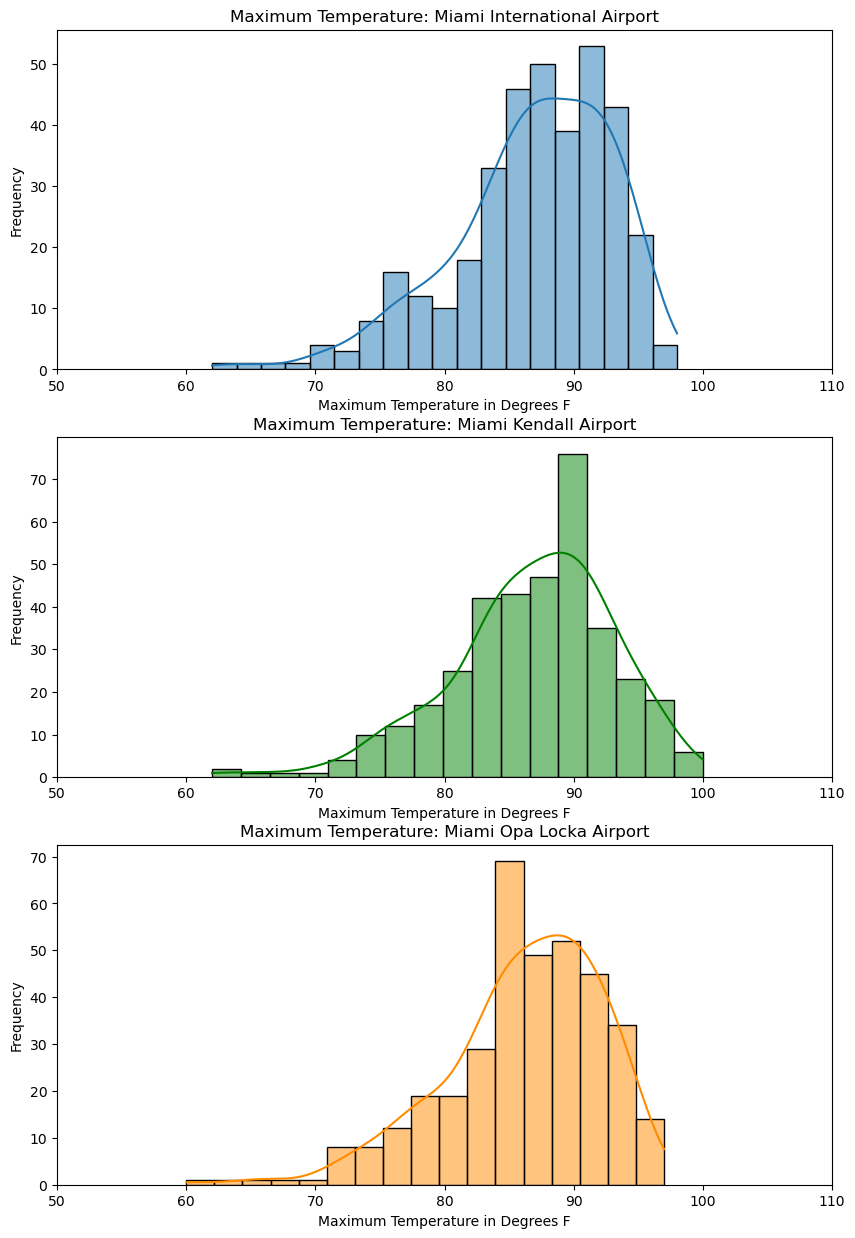

In [62]:
#hist plots for Maximum Temperature

fig, ax = plt.subplots(nrows = 3,figsize = (10,15))

sns.histplot(x = 'TMAX', data = df_w.loc[df_w['NAME'] == 'MIAMI INTERNATIONAL AIRPORT, FL US'], ax = ax[0], kde = True)

sns.histplot(x = 'TMAX', data = df_w.loc[df_w['NAME'] == 'MIAMI KENDALL TAMIAMI EXEC AIRPORT, FL US'], ax = ax[1], kde = True, color = 'green')

sns.histplot(x = 'TMAX', data = df_w.loc[df_w['NAME'] == 'MIAMI OPA LOCKA AIRPORT, FL US'], ax = ax[2], kde = True, color = 'darkorange')

ax[0].set_ylabel('Frequency')
ax[1].set_ylabel('Frequency')
ax[2].set_ylabel('Frequency')

ax[0].set_xlabel('Maximum Temperature in Degrees F')
ax[1].set_xlabel('Maximum Temperature in Degrees F')
ax[2].set_xlabel('Maximum Temperature in Degrees F')


ax[0].set_title('Maximum Temperature: Miami International Airport')
ax[1].set_title('Maximum Temperature: Miami Kendall Airport')
ax[2].set_title('Maximum Temperature: Miami Opa Locka Airport')

ax[0].set_xlim(50, 110)
ax[1].set_xlim(50, 110)
ax[2].set_xlim(50, 110)


plt.show()

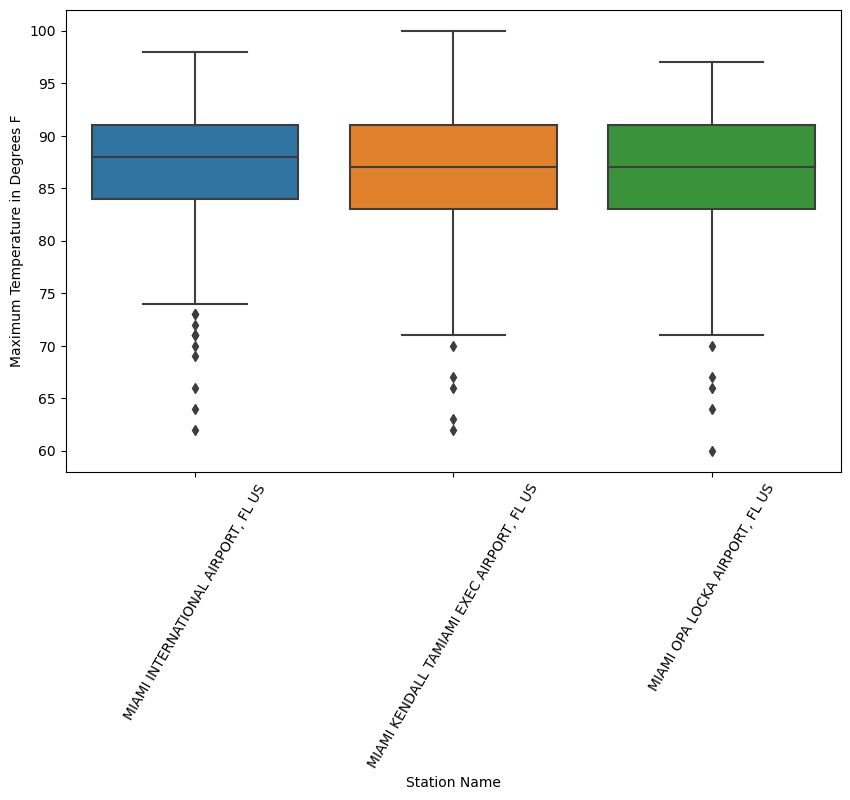

In [63]:
fig, ax = plt.subplots(figsize = (10,6))


sns.boxplot(y = 'TMAX', x = 'NAME', data = df_w)

plt.xticks(rotation = 60)
plt.xlabel('Station Name')

plt.ylabel('Maximum Temperature in Degrees F')

plt.show()

From the above summary statistics and plots we can see that all three stations have similar Max Temperature distribution even if they are miles apart from each other. 

While we found difference across the groundwater levels, weather data has been quite similar for all the stations till now. This may be a natural outcome as even if we took stations as far away as possible Miami itself is a smaller city.

In [64]:
#Summary statistics for Minimum Temperature

df_w.groupby('NAME')[['TMIN']].describe().T

NAME        MIAMI INTERNATIONAL AIRPORT, FL US  \
TMIN count                          365.000000   
     mean                            72.824658   
     std                              6.618069   
     min                             44.000000   
     25%                             69.000000   
     50%                             73.000000   
     75%                             78.000000   
     max                             84.000000   

NAME        MIAMI KENDALL TAMIAMI EXEC AIRPORT, FL US  \
TMIN count                                 363.000000   
     mean                                   69.027548   
     std                                     7.534034   
     min                                    38.000000   
     25%                                    64.000000   
     50%                                    70.000000   
     75%                                    75.000000   
     max                                    84.000000   

NAME        MIAMI OPA LOCKA AIRPORT, FL US  
TMIN count                      363.000000  
     mean                        70.705234  
     std                          6.851112  
     min                         42.000000  
     25%                         67.000000  
     50%                         72.000000  
     75%                         76.000000  
     max                         82.000000

In [65]:
print("Range:", df_w.groupby('NAME')[['TMIN']].max() - df_w.groupby('NAME')[['TMIN']].min())
print("\nIQR:", df_w.groupby('NAME')[['TMIN']].quantile(0.75) - df_w.groupby('NAME')[['TMIN']].quantile(0.25))

Range:                                            TMIN
NAME                                           
MIAMI INTERNATIONAL AIRPORT, FL US         40.0
MIAMI KENDALL TAMIAMI EXEC AIRPORT, FL US  46.0
MIAMI OPA LOCKA AIRPORT, FL US             40.0

IQR:                                            TMIN
NAME                                           
MIAMI INTERNATIONAL AIRPORT, FL US          9.0
MIAMI KENDALL TAMIAMI EXEC AIRPORT, FL US  11.0
MIAMI OPA LOCKA AIRPORT, FL US              9.0


Lowest Temperature recorded in Miami for the year 2023 was 38 degrees farinheit or 3.33 degrees celcius as per the weather stations we covered. Besides that minimum temperature recorded across the year appears to be quite similar across all the three regions with Miami Kendall having just a little different range and IQR, but that too is just a difference of 2-4 degrees.

Besides that Miami International Airport recorded highest Mean Minimum Temperature but again difference is within 1-2 degrees only so from the summary statistics we can say that all of them have similar distributions.

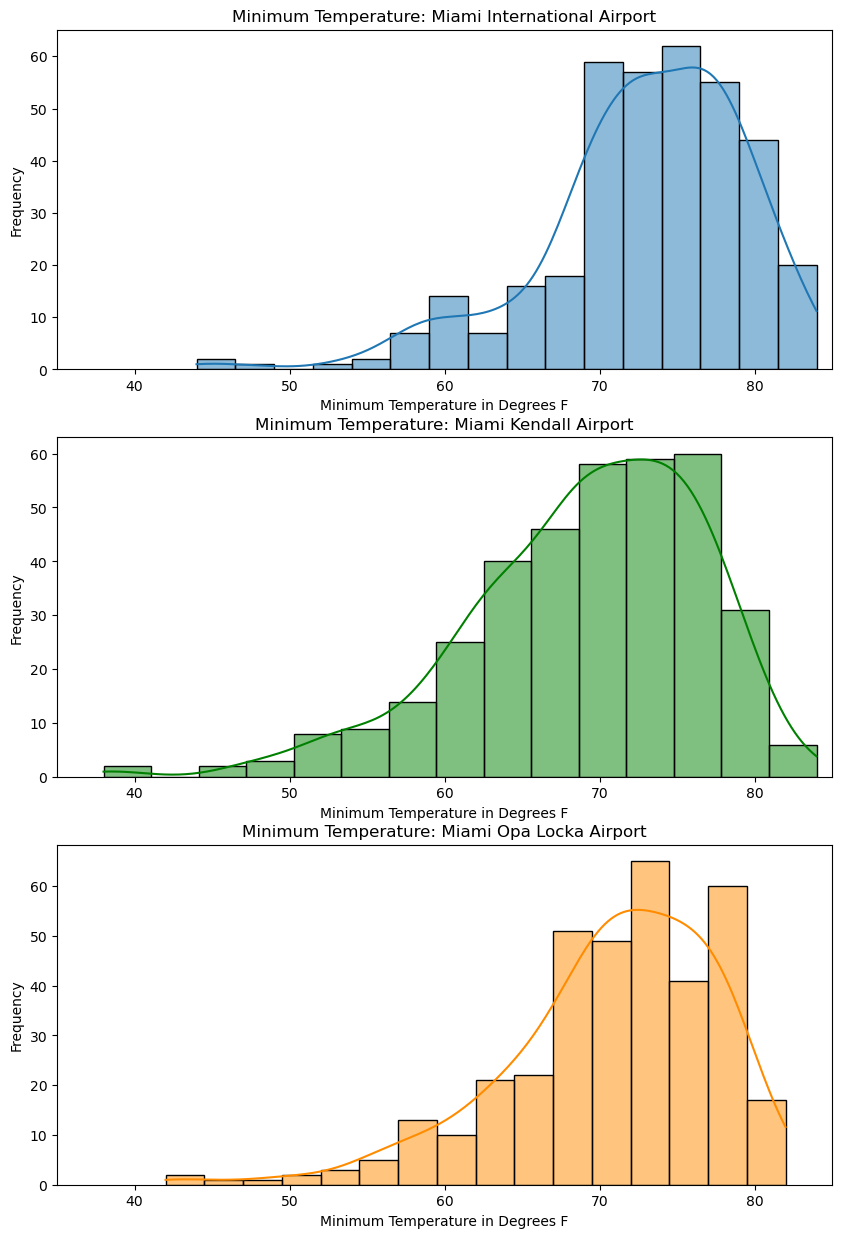

In [66]:
#hist plots for Minimum Temperature

fig, ax = plt.subplots(nrows = 3,figsize = (10,15))

sns.histplot(x = 'TMIN', data = df_w.loc[df_w['NAME'] == 'MIAMI INTERNATIONAL AIRPORT, FL US'], ax = ax[0], kde = True)

sns.histplot(x = 'TMIN', data = df_w.loc[df_w['NAME'] == 'MIAMI KENDALL TAMIAMI EXEC AIRPORT, FL US'], ax = ax[1], kde = True, color = 'green')

sns.histplot(x = 'TMIN', data = df_w.loc[df_w['NAME'] == 'MIAMI OPA LOCKA AIRPORT, FL US'], ax = ax[2], kde = True, color = 'darkorange')

ax[0].set_ylabel('Frequency')
ax[1].set_ylabel('Frequency')
ax[2].set_ylabel('Frequency')

ax[0].set_xlabel('Minimum Temperature in Degrees F')
ax[1].set_xlabel('Minimum Temperature in Degrees F')
ax[2].set_xlabel('Minimum Temperature in Degrees F')

ax[0].set_title('Minimum Temperature: Miami International Airport')
ax[1].set_title('Minimum Temperature: Miami Kendall Airport')
ax[2].set_title('Minimum Temperature: Miami Opa Locka Airport')

ax[0].set_xlim(35, 85)
ax[1].set_xlim(35, 85)
ax[2].set_xlim(35, 85)


plt.show()

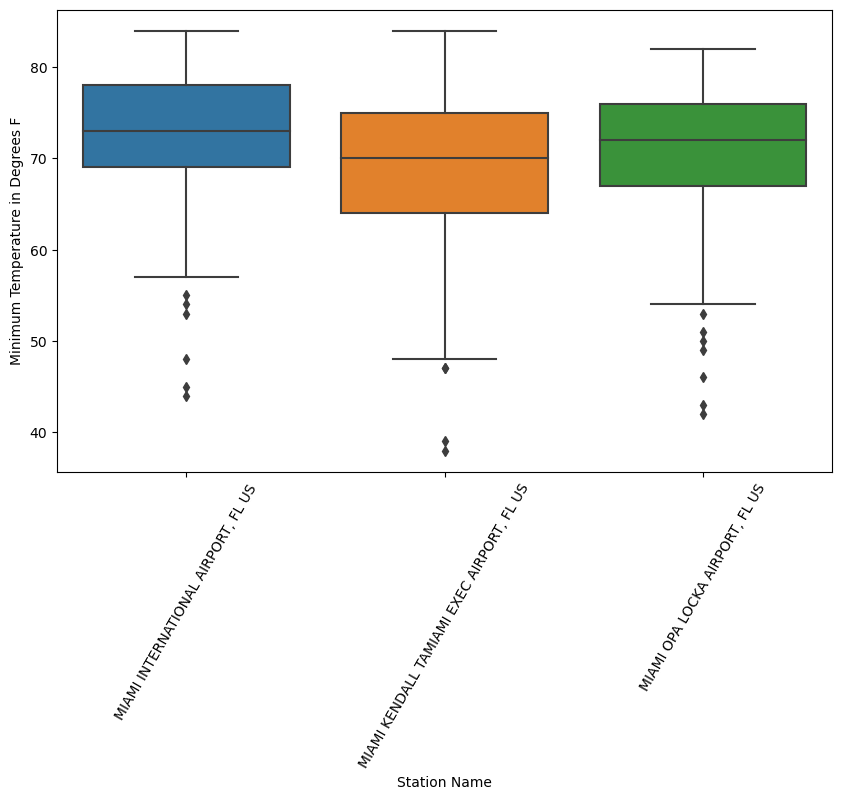

In [67]:
fig, ax = plt.subplots(figsize = (10,6))


sns.boxplot(y = 'TMIN', x = 'NAME', data = df_w)

plt.xticks(rotation = 60)
plt.xlabel('Station Name')

plt.ylabel('Minimum Temperature in Degrees F')

plt.show()

Histograms and boxplots of Minimum temperatureare quite similar to the Maximum temperature as far as overall spread is concerned. However, Kendall has lower median values than International and Opa Locka with a slightly larger range as we saw from summary statistics. 

All this implies that Temperature recordings across the three weather stations are quite consistent and similar. This means that overall Miami and its surrounding areas have similar daily temperatures.

And this holds true for Average Wind Speed and Precipitation too. At this point we will include Precipitation in temperature analysis to see if there is any correlation we can find via graphs, especially after getting less than 0.01 correlation in heatmap before. We will cover impact of precipitation on Maximum daily temperature for this.

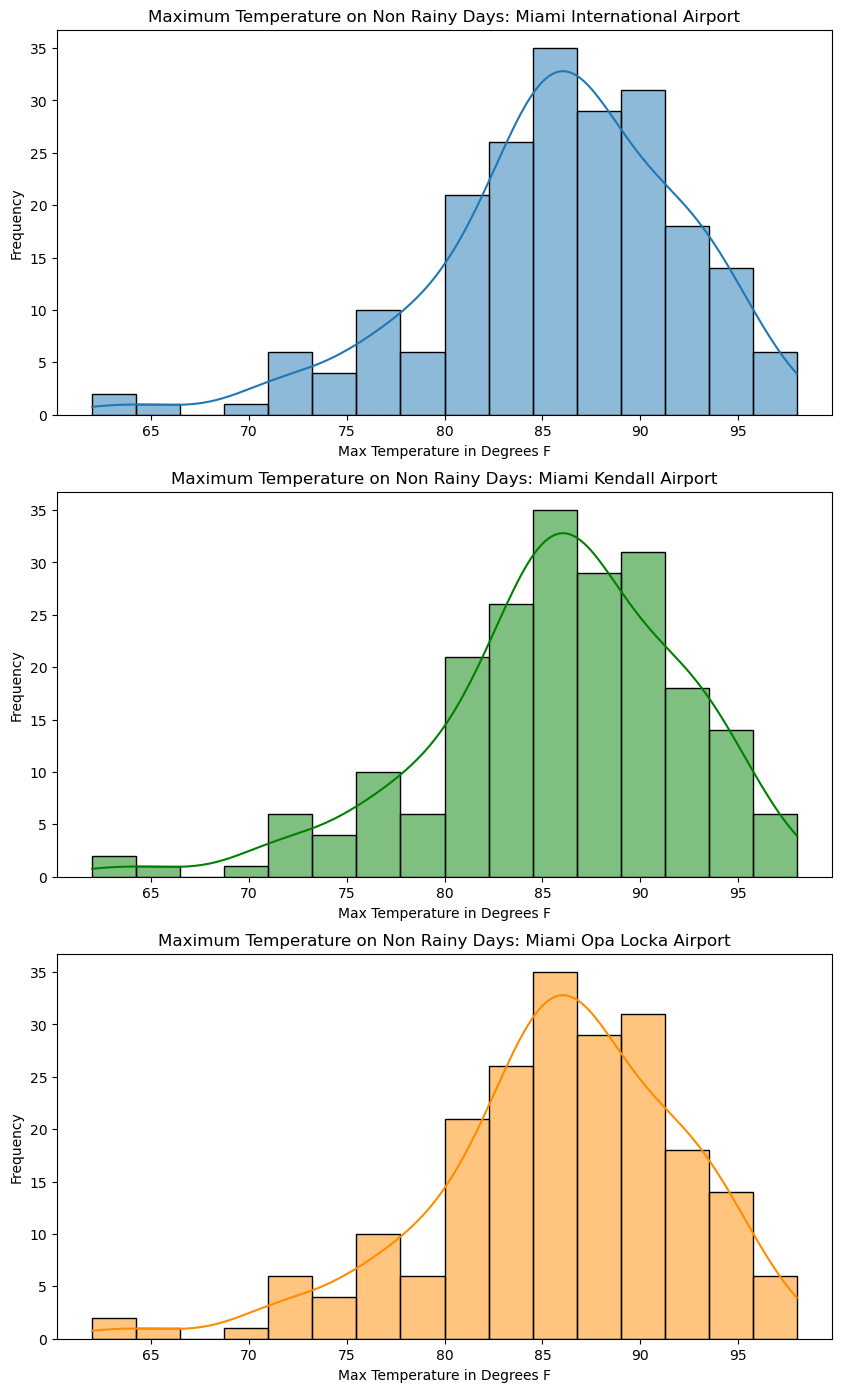

In [68]:
#Plots for PRCP == 0 Max temperature

fig, ax = plt.subplots(nrows = 3,figsize = (10,17))

sns.histplot(x = 'TMAX', data = df_w.loc[np.logical_and(df_w['PRCP'] == 0, df_w['NAME'] == 'MIAMI INTERNATIONAL AIRPORT, FL US')], ax = ax[0], kde = True)

sns.histplot(x = 'TMAX', data = df_w.loc[np.logical_and(df_w['PRCP'] == 0, df_w['NAME'] == 'MIAMI INTERNATIONAL AIRPORT, FL US')], ax = ax[1], kde = True, color = 'green')

sns.histplot(x = 'TMAX', data = df_w.loc[np.logical_and(df_w['PRCP'] == 0, df_w['NAME'] == 'MIAMI INTERNATIONAL AIRPORT, FL US')], ax = ax[2], kde = True, color = 'darkorange')

ax[0].set_ylabel('Frequency')
ax[1].set_ylabel('Frequency')
ax[2].set_ylabel('Frequency')

ax[0].set_xlabel('Max Temperature in Degrees F')
ax[1].set_xlabel('Max Temperature in Degrees F')
ax[2].set_xlabel('Max Temperature in Degrees F')

ax[0].set_title('Maximum Temperature on Non Rainy Days: Miami International Airport')
ax[1].set_title('Maximum Temperature on Non Rainy Days: Miami Kendall Airport')
ax[2].set_title('Maximum Temperature on Non Rainy Days: Miami Opa Locka Airport')

plt.show()

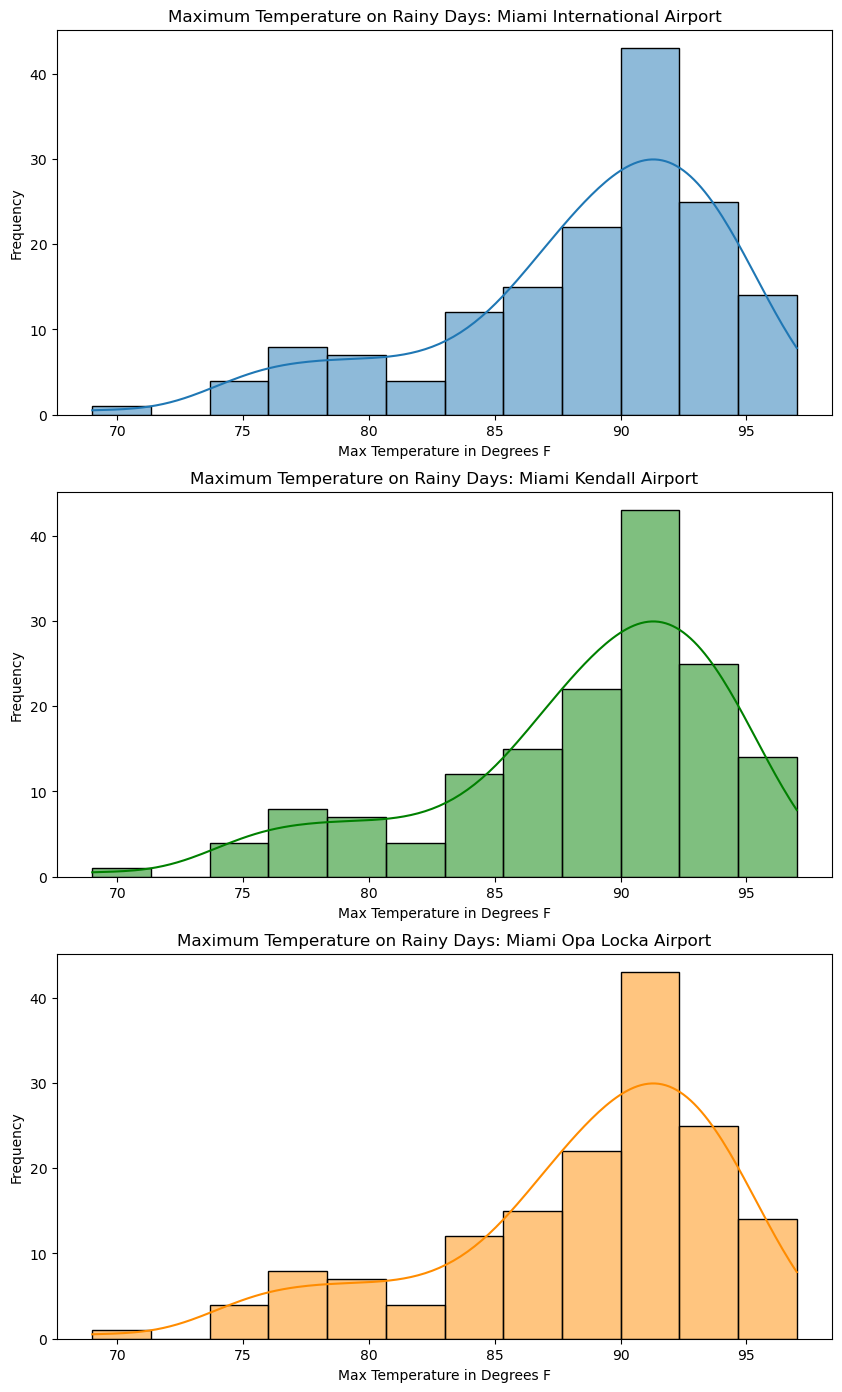

In [69]:
#Plots for PRCP > 0 Max temperature

fig, ax = plt.subplots(nrows = 3,figsize = (10,17))

sns.histplot(x = 'TMAX', data = df_w.loc[np.logical_and(df_w['PRCP'] > 0, df_w['NAME'] == 'MIAMI INTERNATIONAL AIRPORT, FL US')], ax = ax[0], kde = True)

sns.histplot(x = 'TMAX', data = df_w.loc[np.logical_and(df_w['PRCP'] > 0, df_w['NAME'] == 'MIAMI INTERNATIONAL AIRPORT, FL US')], ax = ax[1], kde = True, color = 'green')

sns.histplot(x = 'TMAX', data = df_w.loc[np.logical_and(df_w['PRCP'] > 0, df_w['NAME'] == 'MIAMI INTERNATIONAL AIRPORT, FL US')], ax = ax[2], kde = True, color = 'darkorange')

ax[0].set_ylabel('Frequency')
ax[1].set_ylabel('Frequency')
ax[2].set_ylabel('Frequency')

ax[0].set_xlabel('Max Temperature in Degrees F')
ax[1].set_xlabel('Max Temperature in Degrees F')
ax[2].set_xlabel('Max Temperature in Degrees F')

ax[0].set_title('Maximum Temperature on Rainy Days: Miami International Airport')
ax[1].set_title('Maximum Temperature on Rainy Days: Miami Kendall Airport')
ax[2].set_title('Maximum Temperature on Rainy Days: Miami Opa Locka Airport')

plt.show()

Precipitation Equal to 0 produced similar plots for all three regions with all three plots having peak around 85 degrees farenheit with a left skew. With precipitation greater than 0, that is on rainy days, we are getting a higher peak at 90 degrees farenheit with a left skew, mean of distributions based on rainy days is higher than non rainy days.

This implies that rainy days are generally hotter than non rainy days.

Before analyzing Monthly Dataset we will check Temperatures once again while focusing on the differences in temperatures, that is daily range of temperature.

In [70]:
#Summary statistics for Temperature Difference

df_w.groupby('NAME')[['TDIFF']].describe().T

NAME         MIAMI INTERNATIONAL AIRPORT, FL US  \
TDIFF count                          365.000000   
      mean                            14.041096   
      std                              3.684831   
      min                              3.000000   
      25%                             12.000000   
      50%                             14.000000   
      75%                             16.000000   
      max                             30.000000   

NAME         MIAMI KENDALL TAMIAMI EXEC AIRPORT, FL US  \
TDIFF count                                 363.000000   
      mean                                   17.763085   
      std                                     4.548579   
      min                                     4.000000   
      25%                                    15.000000   
      50%                                    18.000000   
      75%                                    20.000000   
      max                                    35.000000   

NAME         MIAMI OPA LOCKA AIRPORT, FL US  
TDIFF count                      363.000000  
      mean                        15.432507  
      std                          3.824570  
      min                          3.000000  
      25%                         13.000000  
      50%                         15.000000  
      75%                         18.000000  
      max                         31.000000

In [71]:
print("Range:", df_w.groupby('NAME')[['TDIFF']].max() - df_w.groupby('NAME')[['TDIFF']].min())
print("\nIQR:", df_w.groupby('NAME')[['TDIFF']].quantile(0.75) - df_w.groupby('NAME')[['TDIFF']].quantile(0.25))

Range:                                            TDIFF
NAME                                            
MIAMI INTERNATIONAL AIRPORT, FL US          27.0
MIAMI KENDALL TAMIAMI EXEC AIRPORT, FL US   31.0
MIAMI OPA LOCKA AIRPORT, FL US              28.0

IQR:                                            TDIFF
NAME                                            
MIAMI INTERNATIONAL AIRPORT, FL US           4.0
MIAMI KENDALL TAMIAMI EXEC AIRPORT, FL US    5.0
MIAMI OPA LOCKA AIRPORT, FL US               5.0


Summary statistics paint same image as before for temperature data, all stations providing very similar results.

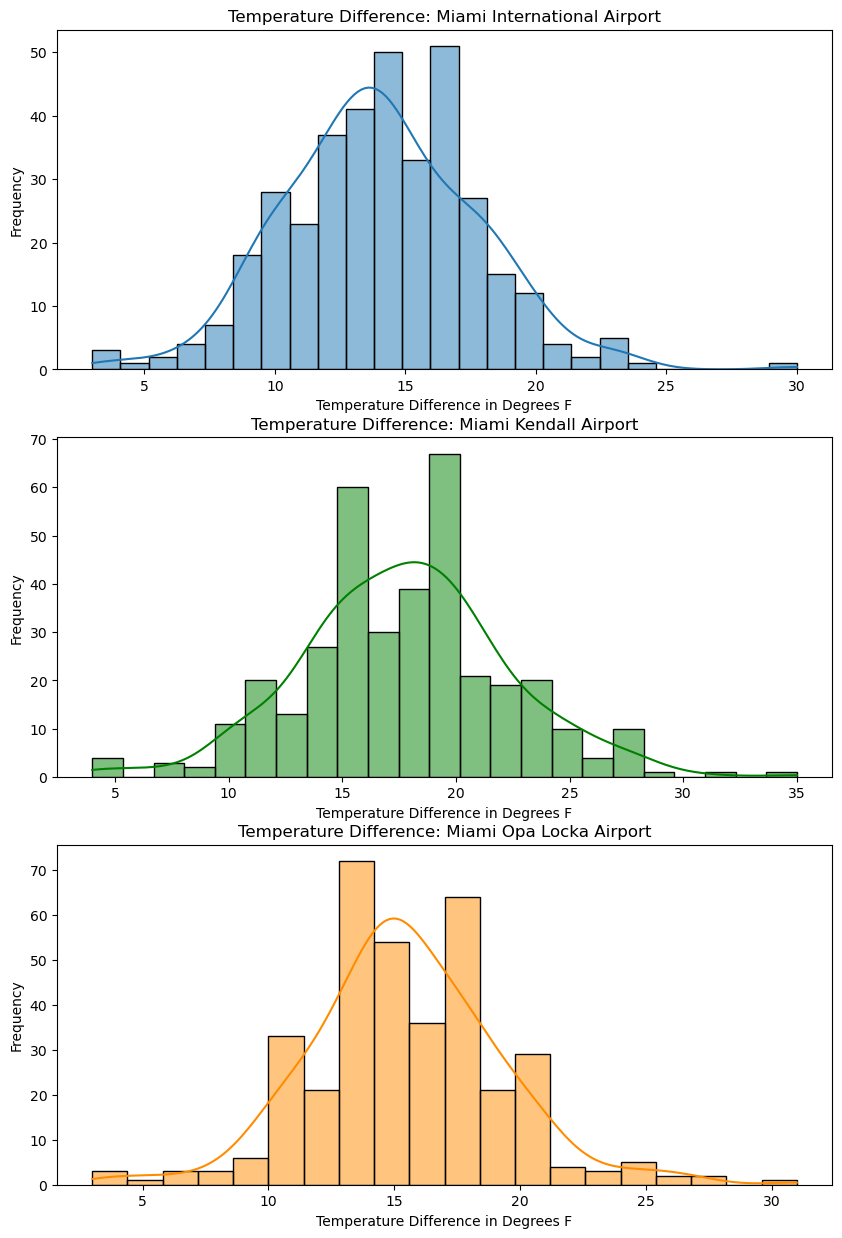

In [72]:
#hist plots for Temperature Difference

fig, ax = plt.subplots(nrows = 3,figsize = (10,15))

sns.histplot(x = 'TDIFF', data = df_w.loc[df_w['NAME'] == 'MIAMI INTERNATIONAL AIRPORT, FL US'], ax = ax[0], kde = True)

sns.histplot(x = 'TDIFF', data = df_w.loc[df_w['NAME'] == 'MIAMI KENDALL TAMIAMI EXEC AIRPORT, FL US'], ax = ax[1], kde = True, color = 'green')

sns.histplot(x = 'TDIFF', data = df_w.loc[df_w['NAME'] == 'MIAMI OPA LOCKA AIRPORT, FL US'], ax = ax[2], kde = True, color = 'darkorange')

ax[0].set_ylabel('Frequency')
ax[1].set_ylabel('Frequency')
ax[2].set_ylabel('Frequency')

ax[0].set_xlabel('Temperature Difference in Degrees F')
ax[1].set_xlabel('Temperature Difference in Degrees F')
ax[2].set_xlabel('Temperature Difference in Degrees F')

ax[0].set_title('Temperature Difference: Miami International Airport')
ax[1].set_title('Temperature Difference: Miami Kendall Airport')
ax[2].set_title('Temperature Difference: Miami Opa Locka Airport')


plt.show()

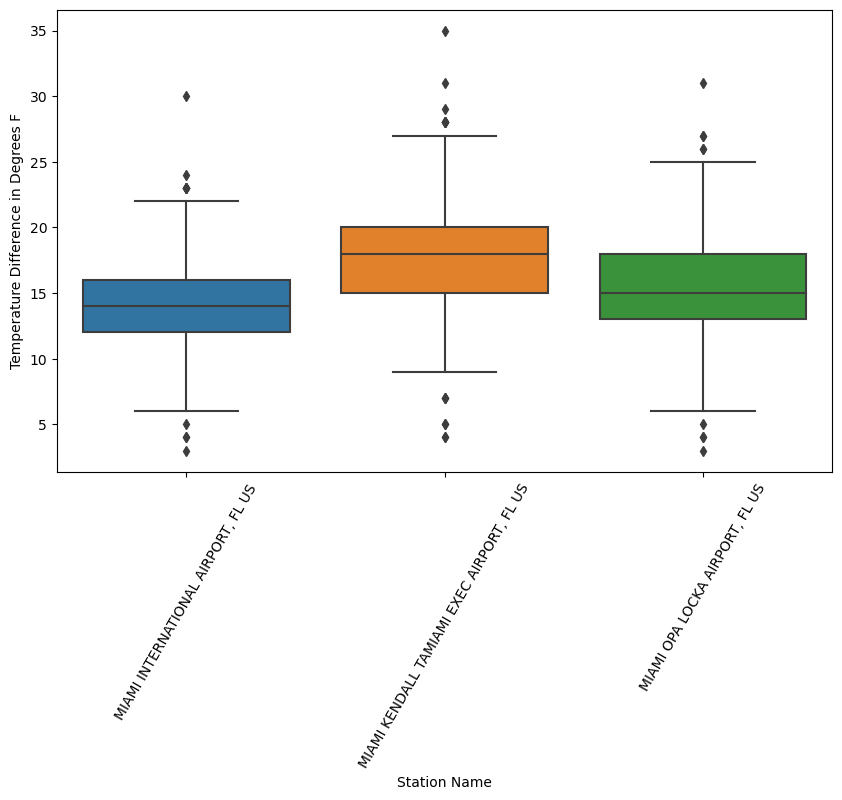

In [73]:
fig, ax = plt.subplots(figsize = (10,6))


sns.boxplot(y = 'TDIFF', x = 'NAME', data = df_w)

plt.xticks(rotation = 60)
plt.xlabel('Station Name')

plt.ylabel('Temperature Difference in Degrees F')

plt.show()

Kendall has slightly different distribution than the others with slightly higher value. However, variability is similar across all three regions. This implies that while maximum temperatures are similar across regions, minimum temperatures are a bit higher in Kendall, which inturn impacts the Daily Temperature Range too as it is also higher than the other two regions.

### Monthly data 

In [74]:
#Loading Monthly Dataset

df_month.head()

,MONTH,GW_LEVEL_INT,GW_LEVEL_KEN,GW_LEVEL_OPA,GW_LEVEL_MEAN,AWND,PRCP,TMAX,TMIN
0,1,2.348710,1.892581,3.331613,2.524301,7.196344,0.001505,80.118280,61.064516
1,2,2.781786,2.202857,3.840714,2.941786,7.789405,0.208095,83.107143,66.095238
2,3,2.257742,1.832903,3.316774,2.469140,8.192043,0.077473,84.720430,66.677419
3,4,3.702333,2.747667,3.761000,3.403667,8.513000,0.329556,86.233333,70.777778
4,5,2.866129,2.154839,4.070323,3.030430,7.020538,0.226989,88.301075,71.806452


In [75]:
#Summary statistics for Monthly Dataset

df_month.describe()

,MONTH,GW_LEVEL_INT,GW_LEVEL_KEN,GW_LEVEL_OPA,GW_LEVEL_MEAN,AWND,PRCP,TMAX,TMIN
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,6.500000,3.020703,2.327246,3.925517,3.091155,7.245871,0.223965,86.596906,70.854128
std,3.605551,0.480624,0.321638,0.355724,0.351560,1.321592,0.118679,5.219236,5.701492
min,1.000000,2.257742,1.832903,3.316774,2.469140,4.846774,0.001505,76.956989,61.064516
25%,3.750000,2.829317,2.174460,3.755105,2.939807,6.346768,0.120806,83.222619,66.531874
50%,6.500000,2.885806,2.224839,3.989575,3.072382,7.492874,0.268333,86.810215,71.292115
75%,9.250000,3.335976,2.521919,4.144167,3.406594,8.235032,0.315102,91.102778,75.263889
max,12.000000,3.734667,2.860333,4.521935,3.529111,9.236452,0.354000,93.763441,78.698925


In [76]:
df_w.groupby('NAME')[['AWND']].describe().T

NAME        MIAMI INTERNATIONAL AIRPORT, FL US  \
AWND count                          365.000000   
     mean                             6.974767   
     std                              2.853239   
     min                              2.240000   
     25%                              4.920000   
     50%                              6.490000   
     75%                              8.280000   
     max                             18.790000   

NAME        MIAMI KENDALL TAMIAMI EXEC AIRPORT, FL US  \
AWND count                                 364.000000   
     mean                                    6.978104   
     std                                     3.170711   
     min                                     0.890000   
     25%                                     4.470000   
     50%                                     6.490000   
     75%                                     8.720000   
     max                                    19.010000   

NAME        MIAMI OPA LOCKA AIRPORT, FL US  
AWND count                      364.000000  
     mean                         7.795962  
     std                          3.257696  
     min                          2.460000  
     25%                          5.370000  
     50%                          7.160000  
     75%                          9.400000  
     max                         21.700000

While we already analyzed Groundwater level statistics mentioned above, mean weather statistics are new here.

Maximum Temperature in Miami while averaging across the three stations for the 2023 is 93.763 degrees farenheit, this is lower than 100 degrees farenheit recorded individually by the stations.

Mean Maximum Temperature is 86.59 and Mean Minimum Temperature is 70.854 degrees farenheit. Standard deviation for both is quite similar, 5.22 for maximum and 5.7 for minimum.

Precipitation and Average Wind Speed are also quite similar to before, however maximum value are highly undervalued. This means that their presence varies across different days. Not all three regions may face high rainfall and wind speeds on same day. To further anylze this we will create time series graphs for them across all three regions/stations.

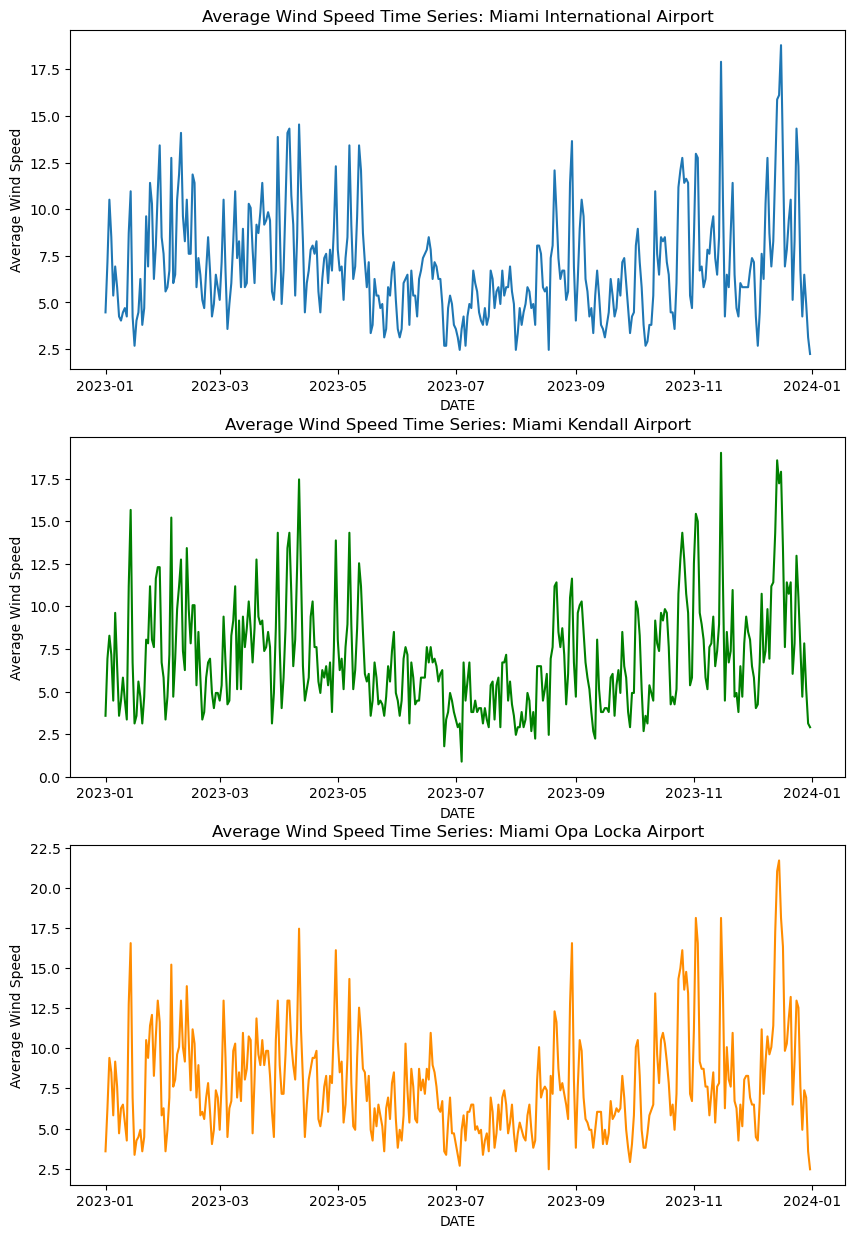

In [77]:
#Time series plot for Average Wind Speed for each station

fig, ax = plt.subplots(nrows = 3,figsize = (10,15))

sns.lineplot(x = 'DATE', y = 'AWND', data = df_w.loc[df_w['NAME'] == 'MIAMI INTERNATIONAL AIRPORT, FL US'], ax = ax[0])

sns.lineplot(x = 'DATE', y = 'AWND', data = df_w.loc[df_w['NAME'] == 'MIAMI KENDALL TAMIAMI EXEC AIRPORT, FL US'], ax = ax[1], color = 'green')

sns.lineplot(x = 'DATE', y = 'AWND', data = df_w.loc[df_w['NAME'] == 'MIAMI OPA LOCKA AIRPORT, FL US'], ax = ax[2], color = 'darkorange')

ax[0].set_ylabel('Average Wind Speed')
ax[1].set_ylabel('Average Wind Speed')
ax[2].set_ylabel('Average Wind Speed')

ax[0].set_title('Average Wind Speed Time Series: Miami International Airport')
ax[1].set_title('Average Wind Speed Time Series: Miami Kendall Airport')
ax[2].set_title('Average Wind Speed Time Series: Miami Opa Locka Airport')


plt.show()

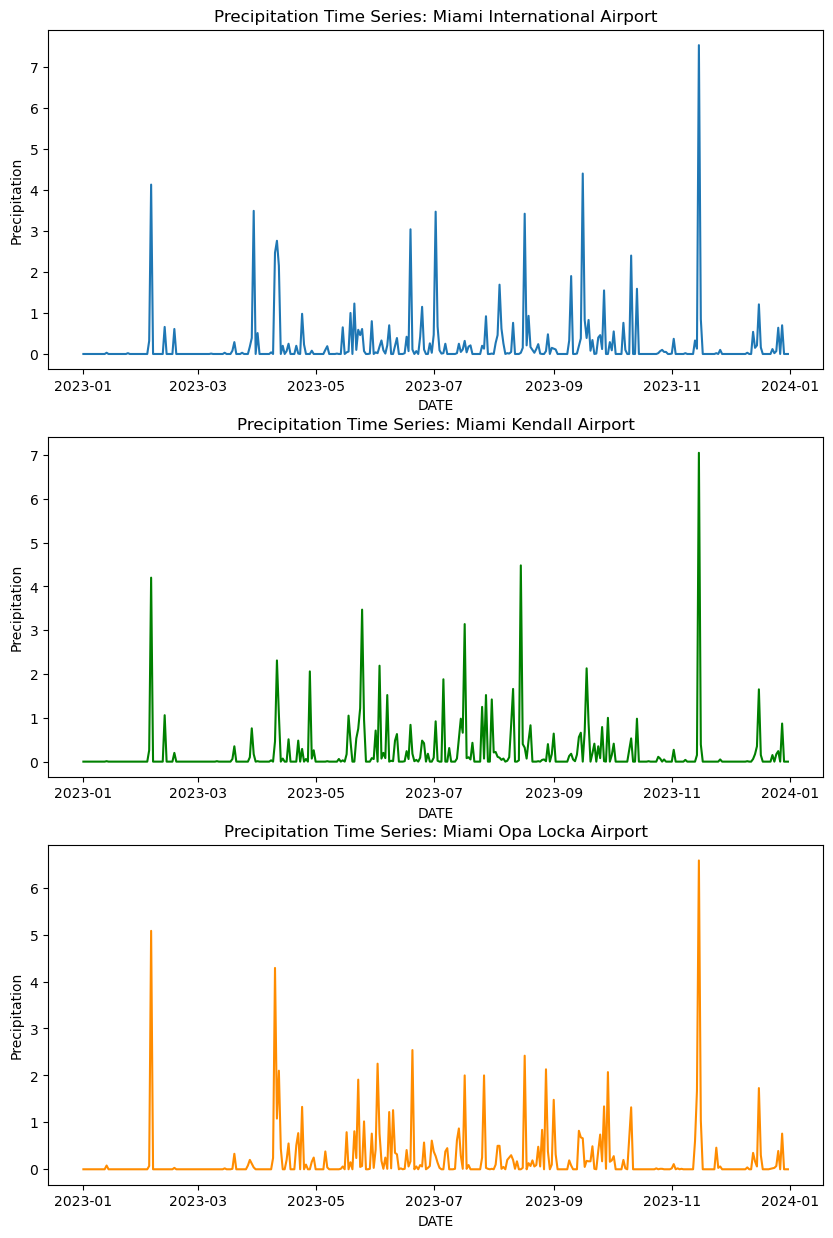

In [78]:
#Time series plot for Average Wind Speed for each station

fig, ax = plt.subplots(nrows = 3,figsize = (10,15))

sns.lineplot(x = 'DATE', y = 'PRCP', data = df_w.loc[df_w['NAME'] == 'MIAMI INTERNATIONAL AIRPORT, FL US'], ax = ax[0])

sns.lineplot(x = 'DATE', y = 'PRCP', data = df_w.loc[df_w['NAME'] == 'MIAMI KENDALL TAMIAMI EXEC AIRPORT, FL US'], ax = ax[1], color = 'green')

sns.lineplot(x = 'DATE', y = 'PRCP', data = df_w.loc[df_w['NAME'] == 'MIAMI OPA LOCKA AIRPORT, FL US'], ax = ax[2], color = 'darkorange')

ax[0].set_ylabel('Precipitation')
ax[1].set_ylabel('Precipitation')
ax[2].set_ylabel('Precipitation')

ax[0].set_title('Precipitation Time Series: Miami International Airport')
ax[1].set_title('Precipitation Time Series: Miami Kendall Airport')
ax[2].set_title('Precipitation Time Series: Miami Opa Locka Airport')


plt.show()

Above plots support our initial observations for this matter. While Average Wind Speed and Precipitation are following similar trend lines for all the stations with slight variations. Among them Miami International and Kendall have very similar trend lines for both of them with Opa Locka having slightly different trend line from them.

Overall, Average Windspeed and Precipitation can be quite different for all three regions with Miami International and Kandell having higher chance of recording similar day to day values. This should also holds true for temperatures too however difference was not observed significantly for them.

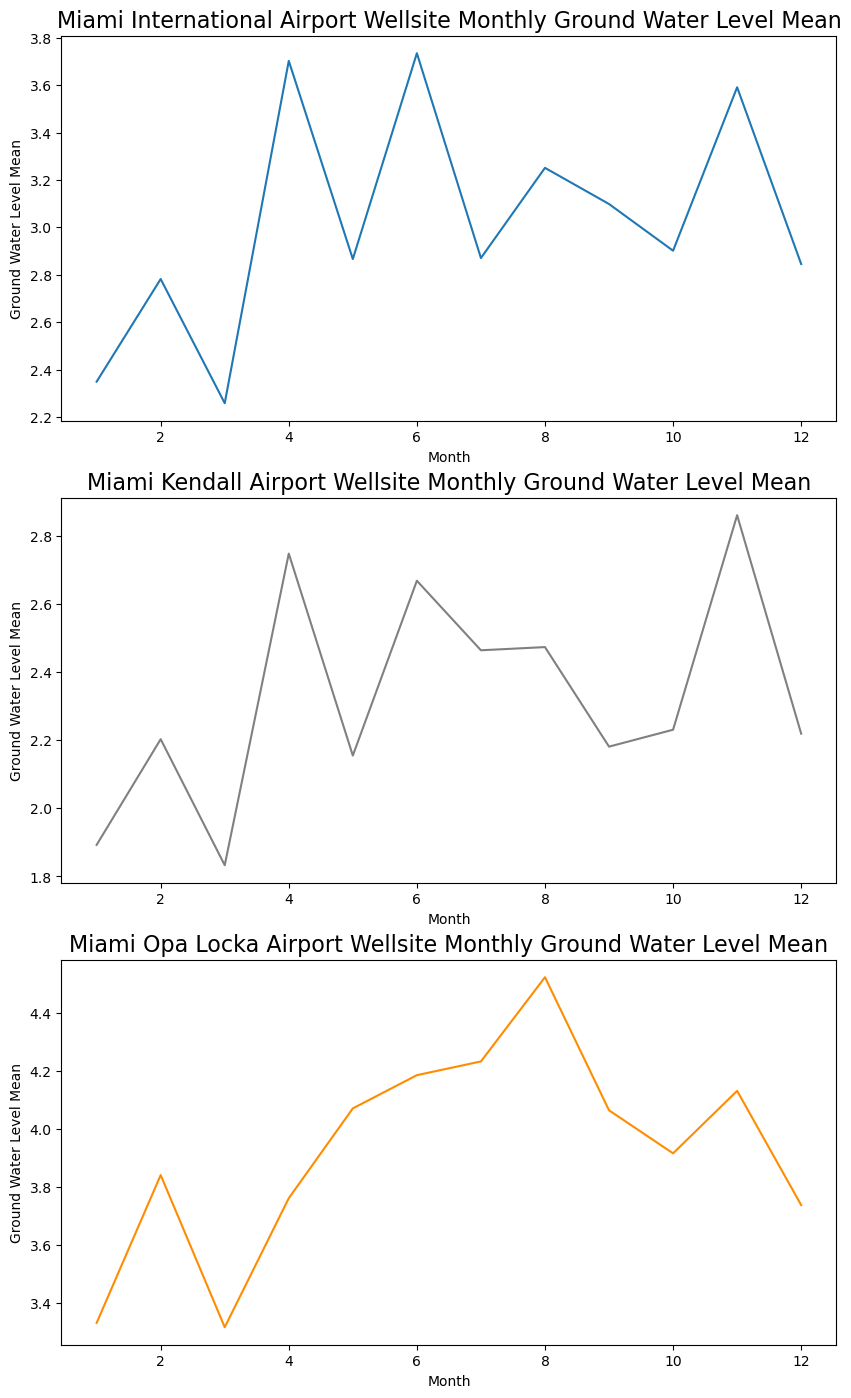

In [79]:
#Monthly Mean Ground Water Level trendline for each station

fig, ax = plt.subplots(nrows = 3,figsize=(10,17))

ax[0] = sns.lineplot(data = df_month, x = 'MONTH', y = 'GW_LEVEL_INT', ax = ax[0])
ax[0].set_title('Miami International Airport Wellsite Monthly Ground Water Level Mean', fontsize = 16)

ax[1] = sns.lineplot(data = df_month, x = 'MONTH', y = 'GW_LEVEL_KEN', ax = ax[1], color = 'gray')
ax[1].set_title('Miami Kendall Airport Wellsite Monthly Ground Water Level Mean', fontsize = 16)

ax[2] = sns.lineplot(data = df_month, x = 'MONTH', y = 'GW_LEVEL_OPA', ax = ax[2], color = 'darkorange')
ax[2].set_title('Miami Opa Locka Airport Wellsite Monthly Ground Water Level Mean', fontsize = 16)

ax[0].set_ylabel('Ground Water Level Mean')
ax[1].set_ylabel('Ground Water Level Mean')
ax[2].set_ylabel('Ground Water Level Mean')

ax[0].set_xlabel('Month')
ax[1].set_xlabel('Month')
ax[2].set_xlabel('Month')


plt.show()

Looking through the trendlines for the Groundwater level across the year 2023 gives us some interesting observations:

1. Across all well sites we are seeing a gradual increase in the Ground Water Level across the year. This is a concerning observation as it means that we have to go deeper to extract the water. This can be cyclical or maybe attributing to some anomaly during 2023, we may need more data to understand this properly.
2. Generally when we see a jump in groundlevel for a month, we also see a reduction in next month or so but in Opa Locka wellsite from March to August we see a gradual increase in the groundwater level.
3. Miami International Airport wellsite and Kendall wellsite are miles apart but just as we observed before, there appears to be some correlations among them as trendlines are following similar trend with peaks and troughs happening at same months. In contrast Opa Locka wellsite keeps increasing until it peak in August.

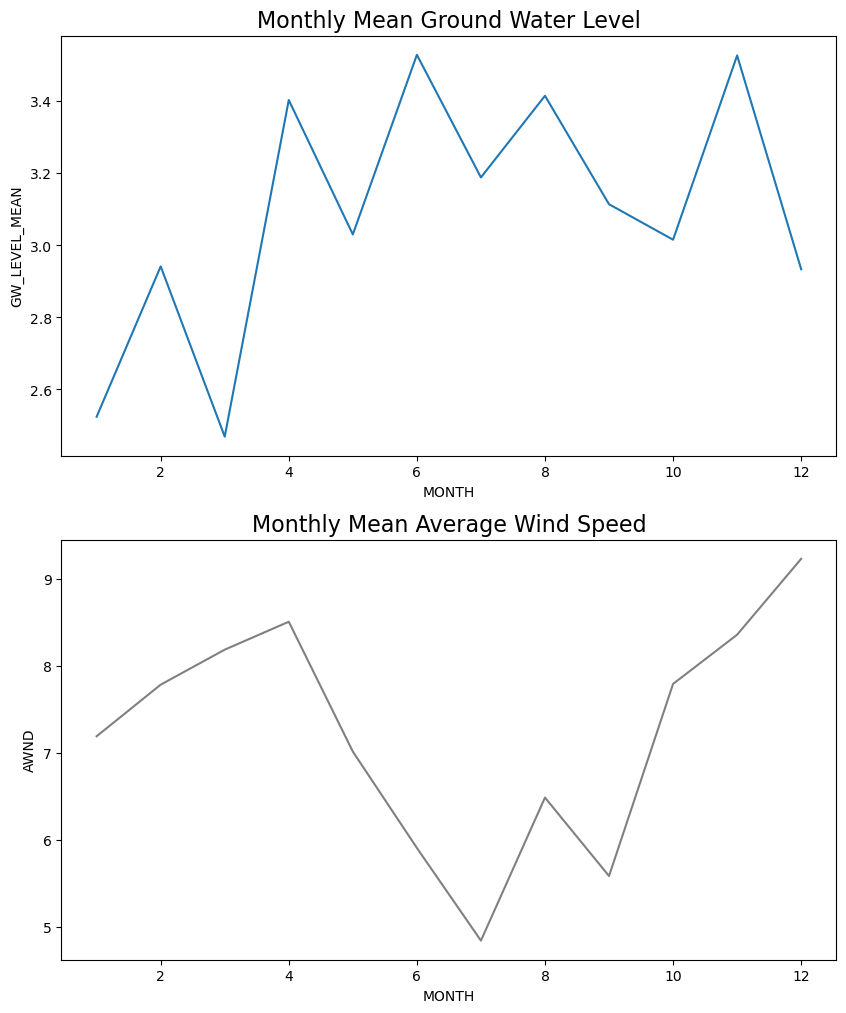

In [80]:
#Monthly Mean Ground Water Level and Average Wind Speed Plots

fig, ax = plt.subplots(nrows = 2,figsize=(10,12))

warnings.filterwarnings("ignore")

ax[0] = sns.lineplot(data = df_month, x = 'MONTH', y = 'GW_LEVEL_MEAN', ax = ax[0])
ax[0].set_title('Monthly Mean Ground Water Level', fontsize = 16)

ax[1] = sns.lineplot(data = df_month, x = 'MONTH', y = 'AWND', ax = ax[1], color = 'gray')
ax[1].set_title('Monthly Mean Average Wind Speed', fontsize = 16)



plt.show()

From the above plots, we can obtain following ovservations:

1. Monthly Mean Ground Water Level is increasing with time. We will need more data to further analyze this trend. Preferably from other groundwells and for a long period of time.

2. Monthly Mean Ground Water Level Trendline appears very similar to Miami International and Kendall wellsites.

2. Monthly Mean Average Wind Speed appears to be cyclic in nature with peaks in the months of March and April before dropping down in the months of August and September, and increasing in the months of November and December before reaching peak levels in the months of March and April.

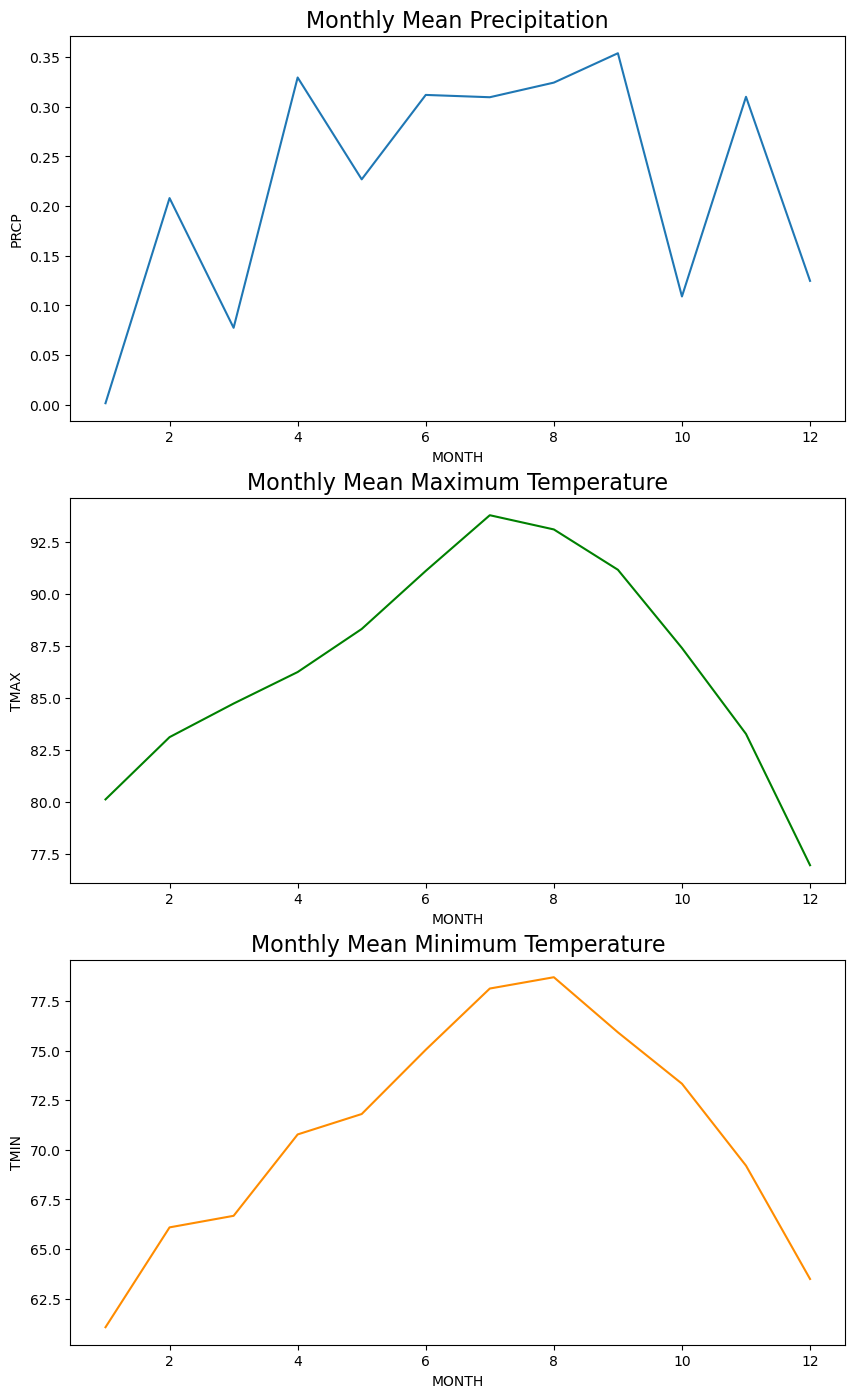

In [81]:
#Monthly Mean Precipitation, Maximum, and Minimum Temperature Plots

fig, ax = plt.subplots(nrows = 3,figsize=(10,17))

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

ax[0] = sns.lineplot(data = df_month, x = 'MONTH', y = 'PRCP', ax = ax[0])
ax[0].set_title('Monthly Mean Precipitation', fontsize = 16)

ax[1] = sns.lineplot(data = df_month, x = 'MONTH', y = 'TMAX', ax = ax[1], color = 'green')
ax[1].set_title('Monthly Mean Maximum Temperature', fontsize = 16)

ax[2] = sns.lineplot(data = df_month, x = 'MONTH', y = 'TMIN', ax = ax[2], color = 'darkorange')
ax[2].set_title('Monthly Mean Minimum Temperature', fontsize = 16)

plt.show()

In above plots we covered Mean Precipitation, Mean Maximum Temperature, and Mean Minimum Temperature.

Mean Precipitation appears to be cyclic with peaking at September and more than 0 throughout the year after January. We could look into further data to support this finding.

Monthly Mean for Maximum and Minimum temperature are following a similar trendline and it appears to be cyclic in nature with temperature rising overall after January until peaking at August before starting to fall down.

## Conclusion

Till now we tidied the data and analyzed it in depth. In this part we will conclude the project by gathering the major observations in Data Analysis phase.

1. Daily Precipitation and Average Wind Speed across the three stations or regions follows similar distributions with low variability. However these regions do not face such weather conditions on same days and there can be a gap, for example, it may rain near Miami International Airport today with no rainfall near other Airports or regions.
2. Precipitation and Average Wind Speed follows a cyclic pattern if we consider monthly data.
3. Daily Maximum Temperature across the three regions also follows a very similar distributions among themselves. However, during rainy days we can expect slightly higher temperature for all the regions.
4. Daily Minimum Temperature for Miami International and Miami Kendall follows similar distributions. However, Miami Opa Locka region has a lower minimum temperature distribution with more variability than other two. Implying that Opa Locka region can get colder than both of the other regions.
5. Maximum and Minimum Temperatures are cyclic in nature too with both peaking near August before falling till December and starts rising from January. 
5. Groundwater Level paints a very different story than other parameters. While they followed overall similar and constant distributions, Groundwater level has been increasing generally throught out the 2023.
6. Groundwater Level for both Miami International and Miami Kendall regions follows a very similar pattern which may underly that both are using same underground resource or atleast the sources are connected withe ach other.
7. Generally when we see a jump in groundlevel for a month, we also see a reduction in next month or so but in Miami Opa Locka region from March to August 2023 we only saw gradual increase in the groundwater level.
8. Miami International Airport recorded highest groundlevel in 2023 and it has highest variability too. However, even then gradual increase in Miami Opa Locka region's Groundlevel was so impactful that it influenced the overall distribution of Groundwater level.

For further analysis we can gather different predictors and try to model the data with machine learning techniques and even with a deep learning model if we get enough predictors and data for it.

Readers may obtain different results by taking different periods and stations however even then on the basis of the findings of the project here we can conclude that while Weather changes across Miami have been quite consistent for 2023, groundwater level varies a lot across the regions. We would suggest gathering more data from different well sites and other water related resources as while unlike other areas where weather can explain a lot of things Miami is hiding its main issues underneath the ground and in water around it.